<a href="https://colab.research.google.com/github/a-gantzia/judging-book-covers-and-titles/blob/main/Judging_book_covers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Should we judge books by their covers?
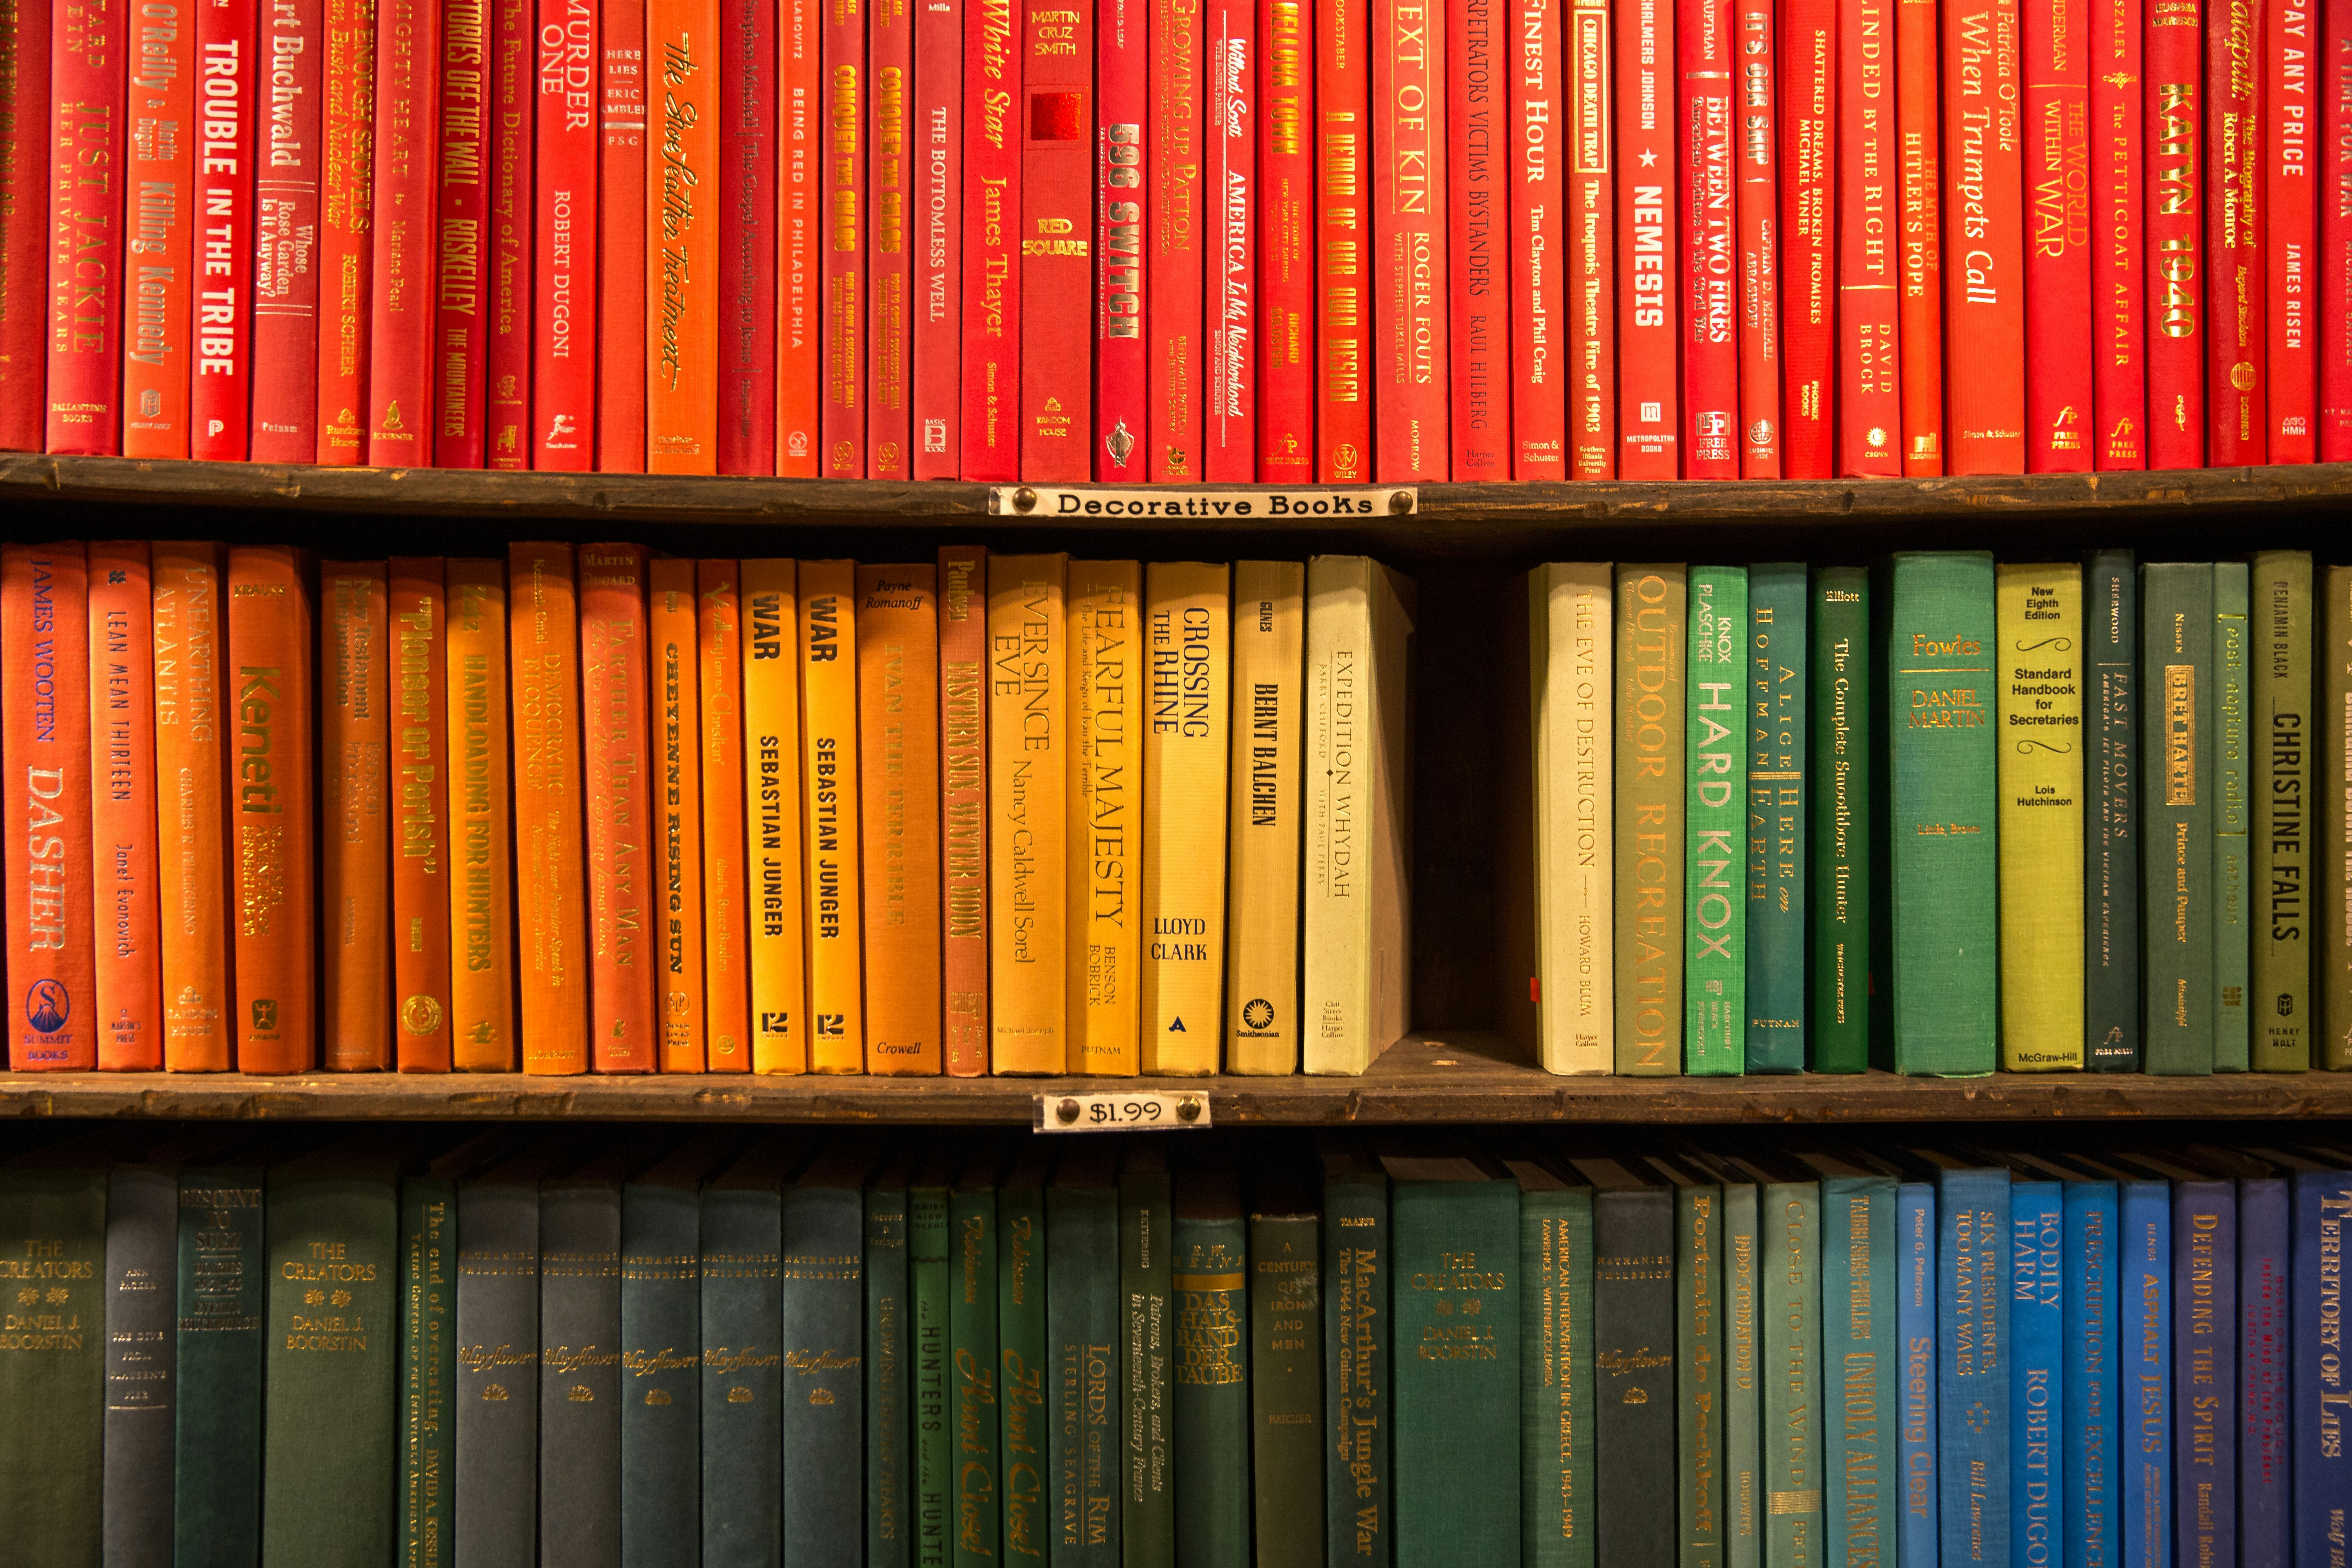

The project investigates the impact of book cover designs on consumer purchasing decisions on Amazon, hypothesizing that visually appealing covers increase sales. Using a dataset of Amazon's best-selling Kindle book covers, the study employs convolutional neural networks and transfer learning to predict market success. Additionally, it incorporates book titles in its analysis, offering insights into effective book marketing strategies. This research aids publishers and authors in optimizing cover designs to boost sales, merging machine learning with market strategy to enhance book visibility in the digital marketplace.

# Amazon scraping

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import shutil
import re
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

folder_path = '/content/drive/MyDrive/Colab Notebooks/HODL_book_covers'
os.chdir(folder_path)

Mounted at /content/drive


In [ ]:
files = ["./amazon_pages/"+f for f in os.listdir('./amazon_pages/') if f.endswith('.htm')]
files

['./amazon_pages/Amazon Best Sellers Best Mystery, Thriller & Suspense.htm',
 './amazon_pages/Amazon Best Sellers Best Mystery, Thriller & Suspense_2.htm',
 './amazon_pages/Amazon Best Sellers Best Mystery, Thriller & Suspense_free.htm',
 './amazon_pages/Amazon Best Sellers Best Mystery, Thriller & Suspense_free_2.htm',
 "./amazon_pages/Amazon Best Sellers Best Children's eBooks.htm",
 "./amazon_pages/Amazon Best Sellers Best Children's eBooks_2.htm",
 "./amazon_pages/Amazon Best Sellers Best Children's eBooks_free.htm",
 "./amazon_pages/Amazon Best Sellers Best Children's eBooks_free_2.htm",
 './amazon_pages/Amazon Best Sellers Best Teen & Young Adult eBooks.htm',
 './amazon_pages/Amazon Best Sellers Best Teen & Young Adult eBooks_2.htm',
 './amazon_pages/Amazon Best Sellers Best Teen & Young Adult eBooks_free.htm',
 './amazon_pages/Amazon Best Sellers Best Teen & Young Adult eBooks_free_2.htm',
 './amazon_pages/Amazon Best Sellers Best Literature & Fiction.htm',
 './amazon_pages/Amaz

In [ ]:
data = []

for file in files:
    with open(file, 'r', encoding='utf-8') as f:
        content = f.read()

    soup = BeautifulSoup(content, 'html.parser')

    for container in soup.findAll('div', class_='_cDEzb_grid-column_2hIsc'):
        #print(container)
        title = container.find('div', class_='_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y').text
        title = re.sub('[^a-zA-Z0-9 \.]', '', title)
        image_url = container.find('img')['src']
        product_url = container.find('a', class_='a-link-normal')['href']
        asin = product_url.split('/')[5]
        shutil.copyfile('./amazon_pages/'+image_url.replace('%20', ' '), './amazon_pages/images/'+asin+'.jpg')

        data.append({
            'title': title,
            'image_url': image_url,
            'product_url': product_url,
            'asin': asin
        })
df = pd.DataFrame(data)
df['image_url'] = df['image_url'].str.replace('%20', ' ')
df.to_csv('amazon_book_data.csv', index=False)

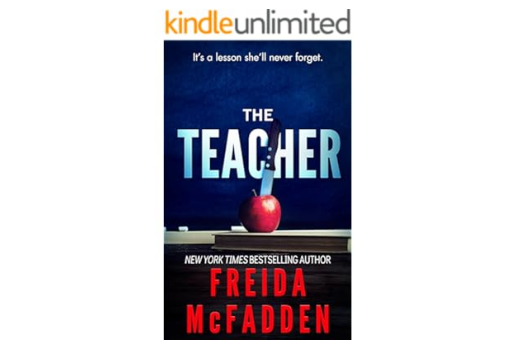

'The Teacher A Psychological Thriller'

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open('./amazon_pages/'+df.image_url[0])
plt.imshow(im)
plt.axis('off')
plt.show()
df.title[0]

In [ ]:
df = pd.read_csv('amazon_book_data.csv')

In [ ]:
df

title  \
0                  The Teacher A Psychological Thriller   
1                     The House Across the Lake A Novel   
2         Never Lie An addictive psychological thriller   
3     The Housemaid An absolutely addictive psycholo...   
4                          Matterhorn Mac Dekker Book 1   
...                                                 ...   
1195                            Iceman SEAL Team Tier 1   
1196  JoAquin SciFi Alien Romance A SciFi Alien Roma...   
1197  A Kiss Beneath the Stars The Malone Brothers B...   
1198  Jaxson The King Who Got Me The Evans Brothers ...   
1199  The Leader an arranged marriage romance Bad Ro...   

                                              image_url  \
0     Amazon Best Sellers Best Mystery, Thriller & S...   
1     Amazon Best Sellers Best Mystery, Thriller & S...   
2     Amazon Best Sellers Best Mystery, Thriller & S...   
3     Amazon Best Sellers Best Mystery, Thriller & S...   
4     Amazon Best Sellers Best Mystery, Thriller & S...   
...                                                 ...   
1195  Amazon Best Sellers Best Romance_free_2_files/...   
1196  Amazon Best Sellers Best Romance_free_2_files/...   
1197  Amazon Best Sellers Best Romance_free_2_files/...   
1198  Amazon Best Sellers Best Romance_free_2_files/...   
1199  Amazon Best Sellers Best Romance_free_2_files/...   

                                            product_url        asin  
0     https://www.amazon.com/Teacher-Psychological-T...  B0CGWBB9XG  
1     https://www.amazon.com/House-Across-Lake-Novel...  B09J216N77  
2     https://www.amazon.com/Never-Lie-addictive-psy...  B0BBL2ZW73  
3     https://www.amazon.com/Housemaid-absolutely-ad...  B09TWSRMCB  
4     https://www.amazon.com/Matterhorn-Christopher-...  B0CCGVFLXC  
...                                                 ...         ...  
1195  https://www.amazon.com/Iceman-SEAL-Team-Tier-1...  B09YSQQ8BZ  
1196  https://www.amazon.com/JoAquin-Sci-Fi-Alien-Ro...  B07CZWMLVC  
1197  https://www.amazon.com/Kiss-Beneath-Stars-Malo...  B07F38FHFX  
1198  https://www.amazon.com/Jaxson-King-Who-Got-Me-...  B0CGLZNXTG  
1199  https://www.amazon.com/LEADER-Mafia-Romance-Ba...  B078R6WT6V  

[1200 rows x 4 columns]

# Clean and download more data sources

Dataset can be found [here](https://www.kaggle.com/datasets/asaniczka/amazon-kindle-books-dataset-2023-130k-books). It contains data for 130,000 kindle e-books, of which we will use a subset.

In [ ]:
if not os.path.exists('book_cover_images'):
        os.makedirs('book_cover_images')

In [ ]:
cats = ['Mystery, Thriller & Suspense',
        "Children's eBooks",
        "Teen & Young Adult",
        "LGBTQ+ eBooks",
        "Literature & Fiction",
        "Science Fiction & Fantasy",
        "Romance"
       ]

In [ ]:
df = df.dropna(subset=['imgUrl'])

        # Convert the 'publishedDate' column to datetime
        df['publishedDate'] = pd.to_datetime(df['publishedDate'], errors='coerce')

        # Filter out rows where 'publishedDate' is after 2022-01-01
        df = df[df['publishedDate'] <= '2023-01-01']

        # Drop rows with NaT in 'publishedDate' column, which result from invalid parsing or NaT entries
        df = df.dropna(subset=['publishedDate'])

In [ ]:
counts = df.category_name.value_counts().reset_index()
counts

index  category_name
0  Mystery, Thriller & Suspense           6272
1             Children's eBooks           5747
2            Teen & Young Adult           5738
3                 LGBTQ+ eBooks           5517
4          Literature & Fiction           4152
5     Science Fiction & Fantasy           3995
6                       Romance           2214

In [ ]:
counts = df.isBestSeller.value_counts().reset_index()
counts

index  isBestSeller
0  False         32972
1   True           663

# Combine data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

In [ ]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/HODL_book_covers'
os.chdir(folder_path)

## Rename Images Amazon

In [ ]:
df

title  \
0                  The Teacher A Psychological Thriller   
1                     The House Across the Lake A Novel   
2         Never Lie An addictive psychological thriller   
3     The Housemaid An absolutely addictive psycholo...   
4                          Matterhorn Mac Dekker Book 1   
...                                                 ...   
1195                            Iceman SEAL Team Tier 1   
1196  JoAquin SciFi Alien Romance A SciFi Alien Roma...   
1197  A Kiss Beneath the Stars The Malone Brothers B...   
1198  Jaxson The King Who Got Me The Evans Brothers ...   
1199  The Leader an arranged marriage romance Bad Ro...   

                                              image_url  \
0     Amazon Best Sellers Best Mystery, Thriller & S...   
1     Amazon Best Sellers Best Mystery, Thriller & S...   
2     Amazon Best Sellers Best Mystery, Thriller & S...   
3     Amazon Best Sellers Best Mystery, Thriller & S...   
4     Amazon Best Sellers Best Mystery, Thriller & S...   
...                                                 ...   
1195  Amazon Best Sellers Best Romance_free_2_files/...   
1196  Amazon Best Sellers Best Romance_free_2_files/...   
1197  Amazon Best Sellers Best Romance_free_2_files/...   
1198  Amazon Best Sellers Best Romance_free_2_files/...   
1199  Amazon Best Sellers Best Romance_free_2_files/...   

                                            product_url        asin  
0     https://www.amazon.com/Teacher-Psychological-T...  B0CGWBB9XG  
1     https://www.amazon.com/House-Across-Lake-Novel...  B09J216N77  
2     https://www.amazon.com/Never-Lie-addictive-psy...  B0BBL2ZW73  
3     https://www.amazon.com/Housemaid-absolutely-ad...  B09TWSRMCB  
4     https://www.amazon.com/Matterhorn-Christopher-...  B0CCGVFLXC  
...                                                 ...         ...  
1195  https://www.amazon.com/Iceman-SEAL-Team-Tier-1...  B09YSQQ8BZ  
1196  https://www.amazon.com/JoAquin-Sci-Fi-Alien-Ro...  B07CZWMLVC  
1197  https://www.amazon.com/Kiss-Beneath-Stars-Malo...  B07F38FHFX  
1198  https://www.amazon.com/Jaxson-King-Who-Got-Me-...  B0CGLZNXTG  
1199  https://www.amazon.com/LEADER-Mafia-Romance-Ba...  B078R6WT6V  

[1200 rows x 4 columns]

In [ ]:
df = pd.read_csv('amazon_book_data.csv')

df = df.drop_duplicates(subset='asin', keep='first')

In [ ]:
df.shape

(958, 4)

In [ ]:
df.head()

title  \
0               The Teacher A Psychological Thriller   
1                  The House Across the Lake A Novel   
2      Never Lie An addictive psychological thriller   
3  The Housemaid An absolutely addictive psycholo...   
4                       Matterhorn Mac Dekker Book 1   

                                           image_url  \
0  Amazon Best Sellers Best Mystery, Thriller & S...   
1  Amazon Best Sellers Best Mystery, Thriller & S...   
2  Amazon Best Sellers Best Mystery, Thriller & S...   
3  Amazon Best Sellers Best Mystery, Thriller & S...   
4  Amazon Best Sellers Best Mystery, Thriller & S...   

                                         product_url        asin  
0  https://www.amazon.com/Teacher-Psychological-T...  B0CGWBB9XG  
1  https://www.amazon.com/House-Across-Lake-Novel...  B09J216N77  
2  https://www.amazon.com/Never-Lie-addictive-psy...  B0BBL2ZW73  
3  https://www.amazon.com/Housemaid-absolutely-ad...  B09TWSRMCB  
4  https://www.amazon.com/Matterhorn-Christopher-...  B0CCGVFLXC

In [ ]:
import os

new_folder_path = '/content/drive/MyDrive/Colab Notebooks/HODL_book_covers/combined_images'
os.makedirs(new_folder_path, exist_ok=True)

df = pd.read_csv('amazon_book_data.csv')
df = df.drop_duplicates(subset='asin', keep='first')
df_notfound = []

for index, row in df.iterrows():
    old_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/HODL_book_covers/amazon_pages/images', f"{row['asin']}.jpg")
    new_path = os.path.join(new_folder_path, f"{row['asin']}.jpg")

    if os.path.exists(old_path):
        try:
            os.rename(old_path, new_path)
        except FileNotFoundError:
            print(f"Error: Image not found for id {row['asin']}")
    else:
        print(f"Warning: Image not found for id {row['asin']}")
        df_notfound.append(row['asin'])

print("Renamed images saved to:", new_folder_path)


Renamed images saved to: /content/drive/MyDrive/Colab Notebooks/HODL_book_covers/combined_images


In [ ]:
df = df.loc[~df['asin'].isin(df_notfound)]

In [ ]:
df.shape

(958, 4)

In [ ]:
df['isBestSeller'] = 1

df.to_csv('amazon_books_cleaned.csv', index=False)

## Merging with other Kindle Book datasets


In [ ]:
amazon_df = pd.read_csv('amazon_books_cleaned.csv')

amazon_df = amazon_df.rename(columns={'ASIN':'asin', 'image_url':'imgUrl', 'product_url':'productURL'})

In [ ]:
amazon_asin_unique = amazon_df['asin'].unique()
len(amazon_asin_unique)

958

In [ ]:
df_all = pd.read_csv('kindle_data.csv')

In [ ]:
cats = ['Mystery, Thriller & Suspense',
        "Children's eBooks",
        "Teen & Young Adult",
        "LGBTQ+ eBooks",
        "Literature & Fiction",
        "Science Fiction & Fantasy",
        "Romance"
       ]
df_all = df_all[df_all['category_name'].isin(cats)]

In [ ]:
df_all['isBestSeller'].value_counts()

False    32972
True       663
Name: isBestSeller, dtype: int64

In [ ]:
df_all.category_name.value_counts().reset_index()

index  category_name
0  Mystery, Thriller & Suspense           6272
1             Children's eBooks           5747
2            Teen & Young Adult           5738
3                 LGBTQ+ eBooks           5517
4          Literature & Fiction           4152
5     Science Fiction & Fantasy           3995
6                       Romance           2214

In [ ]:
df_all = df_all.loc[~df_all['asin'].isin(amazon_asin_unique)]
df_all.shape

(33349, 16)

In [ ]:
df_all['isBestSeller'].value_counts()

False    32735
True       614
Name: isBestSeller, dtype: int64

In [ ]:
def balance_categories(df):

    bestsellers = df[df['isBestSeller'] == True]
    non_bestsellers = df[df['isBestSeller'] == False].sample(n=995+614)
    balanced_df = pd.concat([bestsellers, non_bestsellers])

    return balanced_df

In [ ]:
balanced_df = balance_categories(df_all)

In [ ]:
balanced_df

asin                                              title  \
17261   B0C3CKHR3F         The Running Grave: A Cormoran Strike Novel   
17264   B0BTZTZHW4         Code Red: A Mitch Rapp Novel by Kyle Mills   
17271   B0BRJ6RF4P  12 Months to Live: Jane Smith has a year to li...   
17272   B0BRJ5SLSF                                        23 1/2 Lies   
17312   B0BP98627V                                   Fortune: A Novel   
...            ...                                                ...   
30142   B0B6YL9638         The Unbearable Lightness of Being: A Novel   
50496   B09K5QYZ8N  Dragon Eyre Badblood: An Epic Fantasy Adventur...   
69066   B0C4V7D5X6                                  Light Up the Lamp   
72589   B0B9HJPF51                                               Play   
132959  B07NBXL5PM      The Andalite's Gift (Animorphs Megamorphs #1)   

                      author                                soldBy  \
17261       Robert Galbraith                   Hachette Book Group   
17264            Vince Flynn  Simon and Schuster Digital Sales Inc   
17271        James Patterson                   Hachette Book Group   
17272        James Patterson                   Hachette Book Group   
17312        Ellen Won Steil               Amazon.com Services LLC   
...                      ...                                   ...   
30142          Milan Kundera              HarperCollins Publishers   
50496   Christopher Mitchell               Amazon.com Services LLC   
69066             Kit Oliver               Amazon.com Services LLC   
72589          Nikki Markham               Amazon.com Services LLC   
132959       K. A. Applegate                                   NaN   

                                                   imgUrl  \
17261   https://m.media-amazon.com/images/I/A1kr1aiLR6...   
17264   https://m.media-amazon.com/images/I/71pRK03lIq...   
17271   https://m.media-amazon.com/images/I/81Psk27UcX...   
17272   https://m.media-amazon.com/images/I/81yLgiXobU...   
17312   https://m.media-amazon.com/images/I/712bSCP53Z...   
...                                                   ...   
30142   https://m.media-amazon.com/images/I/61j5Wp+XEw...   
50496   https://m.media-amazon.com/images/I/81av4iBW5c...   
69066   https://m.media-amazon.com/images/I/81JStz8VqF...   
72589   https://m.media-amazon.com/images/I/81lE1Yv9cf...   
132959  https://m.media-amazon.com/images/I/81SbpXJwbv...   

                                  productURL  stars  reviews  price  \
17261   https://www.amazon.com/dp/B0C3CKHR3F    4.6        0  15.99   
17264   https://www.amazon.com/dp/B0BTZTZHW4    4.6        0  14.99   
17271   https://www.amazon.com/dp/B0BRJ6RF4P    4.5        0  14.99   
17272   https://www.amazon.com/dp/B0BRJ5SLSF    4.1        0  14.99   
17312   https://www.amazon.com/dp/B0BP98627V    3.9        0   4.99   
...                                      ...    ...      ...    ...   
30142   https://www.amazon.com/dp/B0B6YL9638    4.5     3836  12.99   
50496   https://www.amazon.com/dp/B09K5QYZ8N    4.7     1205   5.99   
69066   https://www.amazon.com/dp/B0C4V7D5X6    4.3      585   4.95   
72589   https://www.amazon.com/dp/B0B9HJPF51    4.3      193   3.99   
132959  https://www.amazon.com/dp/B07NBXL5PM    4.6        0   3.99   

        isKindleUnlimited  category_id  isBestSeller  isEditorsPick  \
17261               False           21          True          False   
17264               False           21          True          False   
17271               False           21          True          False   
17272               False           21          True          False   
17312                True           21          True          False   
...                   ...          ...           ...            ...   
30142               False            5         False          False   
50496                True           16         False          False   
69066                True           28         False          False   


In [ ]:
balanced_df['asin'].nunique()

2223

In [ ]:
import requests
import sys
import urllib
from csv import reader
import os.path

In [ ]:
img_list = balanced_df.imgUrl.to_list()
asin_list = balanced_df.asin.to_list()

# Scraping the book covers

In [ ]:
for url, asin in zip(img_list, asin_list):

    file_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/HODL_book_covers', f"combined_images/{asin}.jpg")

    try:

        if not os.path.exists(file_path):
            r = requests.get(url).content
            try:
                r = str(r, 'utf-8')
            except UnicodeDecodeError:
                with open(file_path, "wb+") as f:
                    f.write(r)
    except requests.exceptions.MissingSchema:
        print(f"Invalid URL: {url}. Skipping download.")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading {url}: {e}")

In [ ]:
item_names = os.listdir('combined_images')

file_names = [item.replace('.jpg', '')  for item in os.listdir('combined_images')
              if os.path.isfile(os.path.join('combined_images', item))]

print(file_names)

['B009R8DK4Y', 'B09CX84D5J', 'B07NCZ8YRQ', 'B08CS77HFW', 'B01DSWM0FY', 'B099DJN9KP', 'B0CRQLJB9T', 'B0CW1B7Q4Z', 'B073P962D9', 'B07HKS4WRY', 'B096N1VSVP', 'B014977UZW', 'B01DL0TVIW', 'B0CD7HGW19', 'B0192CTMWI', 'B08B32LCPH', 'B00YD469RC', 'B0CLBVS4FD', 'B01BCKVDMU', 'B000YJ54DK', 'B003E8P9G0', 'B009K5CSC4', 'B07THDXZKJ', 'B00280LYI2', 'B00JSXU3KM', 'B07BZS8RS9', 'B01B3DBK10', 'B0066DH0L2', 'B00O87NWBK', 'B00UG9LC4I', 'B005CRQ3RK', 'B075LW4GSQ', 'B07VS3NN2B', 'B0192CTMWS', 'B073R342DW', 'B01MPZ8KKF', 'B003TSEL7S', 'B007TBZ63Y', 'B07DNGC252', 'B01MFBPHNH', 'B00DB30J86', 'B09PQF44T1', 'B00280LYHI', 'B009R4M2D8', 'B083VWLLWS', 'B082V98PTC', 'B00280LYHS', 'B00CJ05CVG', 'B0CNQ4ZK4Z', 'B00FGGD9PG', 'B00FRVH3V6', 'B00F6AADT2', 'B000VYX8L8', 'B00DR1DWA4', 'B00PV2R7VW', 'B002N44XSG', 'B08BR2HFWJ', 'B008OBRL18', 'B00CYA08JM', 'B00BXQCHXI', 'B0074V3BKY', 'B01M04BBS1', 'B00FHCJ6MO', 'B00280LYIM', 'B0CW1H143K', 'B097XG3KXB', 'B00JLPOVDC', 'B08T1HQ8NJ', 'B008T9L6AM', 'B00CJ05EBY', 'B008LV8TSU', 'B09Z

In [ ]:
filtered_df = balanced_df[balanced_df['asin'].isin(file_names)]

filtered_df.to_csv('books_balanced_new.csv', index=False)

In [ ]:
# combine
df_final = pd.concat([amazon_df, filtered_df])

df_final.shape, df_final.asin.nunique()

((3178, 16), 3178)

In [ ]:
df_final.head()

asin                                              title  \
0  B0192CTMYG               Harry Potter and the Sorcerers Stone   
1  B0192CTMW8            Harry Potter and the Chamber of Secrets   
2  B0192CTMX2           Harry Potter and the Prisoner of Azkaban   
3  B0192CTMUU                Harry Potter and the Goblet of Fire   
4  B00280LYHS  The Last Olympian Percy Jackson and the Olympi...   

                                              imgUrl  \
0  Amazon Best Sellers Best Children's eBooks_fil...   
1  Amazon Best Sellers Best Children's eBooks_fil...   
2  Amazon Best Sellers Best Children's eBooks_fil...   
3  Amazon Best Sellers Best Children's eBooks_fil...   
4  Amazon Best Sellers Best Children's eBooks_fil...   

                                          productURL  isBestSeller author  \
0  https://www.amazon.com/Harry-Potter-Sorcerers-...             1    NaN   
1  https://www.amazon.com/Harry-Potter-Chamber-Se...             1    NaN   
2  https://www.amazon.com/Harry-Potter-Prisoner-A...             1    NaN   
3  https://www.amazon.com/Harry-Potter-Goblet-Fir...             1    NaN   
4  https://www.amazon.com/Last-Olympian-Percy-Jac...             1    NaN   

  soldBy  stars  reviews  price isKindleUnlimited  category_id isEditorsPick  \
0    NaN    NaN      NaN    NaN               NaN          NaN           NaN   
1    NaN    NaN      NaN    NaN               NaN          NaN           NaN   
2    NaN    NaN      NaN    NaN               NaN          NaN           NaN   
3    NaN    NaN      NaN    NaN               NaN          NaN           NaN   
4    NaN    NaN      NaN    NaN               NaN          NaN           NaN   

  isGoodReadsChoice publishedDate category_name  
0               NaN           NaN           NaN  
1               NaN           NaN           NaN  
2               NaN           NaN           NaN  
3               NaN           NaN           NaN  
4               NaN           NaN           NaN

In [ ]:
df_final.to_csv('final_combined_books.csv', index=False)

# Best Seller classification using Custom CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/HODL_book_covers'
os.chdir(folder_path)

In [ ]:
import torch
import numpy as np
import pandas as pd
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import time
from PIL import Image,ImageStat
import os,sys
from numpy import asarray
from torchvision.io import read_image
from sklearn.model_selection import train_test_split

torch.manual_seed(7)

## Preprocessing

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
df = pd.read_csv('final_combined_books.csv')

In [ ]:
df.head(2)

asin                                    title  \
0  B0192CTMYG     Harry Potter and the Sorcerers Stone   
1  B0192CTMW8  Harry Potter and the Chamber of Secrets   

                                              imgUrl  \
0  Amazon Best Sellers Best Children's eBooks_fil...   
1  Amazon Best Sellers Best Children's eBooks_fil...   

                                          productURL  isBestSeller author  \
0  https://www.amazon.com/Harry-Potter-Sorcerers-...             1    NaN   
1  https://www.amazon.com/Harry-Potter-Chamber-Se...             1    NaN   

  soldBy  stars  reviews  price isKindleUnlimited  category_id isEditorsPick  \
0    NaN    NaN      NaN    NaN               NaN          NaN           NaN   
1    NaN    NaN      NaN    NaN               NaN          NaN           NaN   

  isGoodReadsChoice publishedDate category_name  
0               NaN           NaN           NaN  
1               NaN           NaN           NaN

In [ ]:
train_x_ = '/content/drive/MyDrive/Colab Notebooks/HODL_book_covers/combined_images/' + df['asin'] +'.jpg'
train_y_ = df['isBestSeller']

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(train_x_, train_y_, test_size=0.05, random_state=42)

train_data = pd.concat([train_x, train_y], axis=1)

test_data = pd.concat([test_x, test_y], axis=1)

In [ ]:
class MyDataset(Dataset):
    def __init__(self,annotations_file,im_transform,target_transform=None):
        self.dataframe = annotations_file
        self.im_transform = im_transform
        self.target_transform = target_transform

    def __len__(self):
        return self.dataframe.shape[0]

    def __getitem__(self,idx):
        image_path = self.dataframe.iloc[idx,0]
        image = Image.open(image_path)

        label = self.dataframe.iloc[idx,1]

        image = self.im_transform(image)

        label = torch.tensor(label,dtype=int)
#         if self.target_transform:
#             label = self.target_transform(label)

        return image,label

In [ ]:
b_size = 256
classes  = 2
learning_rate = 0.0005
epochs = 10

def find_mean_std(data_x):
    R_mean = 0
    G_mean = 0
    B_mean = 0

    R_std = 0
    G_std = 0
    B_std = 0

    total_samples = data_x.shape[0]
    for im in data_x:
        img = Image.open(im)
        transform = transforms.ToTensor()
        im_trns = transform(img)
        mean_r, mean_g, mean_b = torch.mean(im_trns, dim=[1,2])
        std_r,std_g,std_b = torch.std(im_trns,dim=[1,2])
        R_std += std_r
        G_std += std_g
        B_std += std_b
        R_mean += mean_r
        G_mean += mean_g
        B_mean += mean_b

    R_mean = R_mean/total_samples
    G_mean = G_mean/total_samples
    B_mean = B_mean/total_samples

    R_std /= total_samples
    G_std /= total_samples
    B_std /= total_samples

    print("Mean along red channel = ",R_mean)
    print("Mean along green channel = ",G_mean)
    print("Mean along blue channel = ",B_mean)

    print("Std dev along red channel = ",R_std)
    print("Std dev along green channel = ",G_std)
    print("Std dev along blue channel = ",B_std)

    return R_mean,G_mean,B_mean,R_std,G_std,B_std

In [ ]:
R_mean,G_mean,B_mean,R_std,G_std,B_std = find_mean_std(train_x)
image_transformer = transforms.Compose([transforms.ToTensor(),transforms.Resize((64,64)),transforms.Normalize(mean=[R_mean, G_mean, B_mean],
                                                          std=[R_std,G_std,B_std])
                                     ])

trn_dataset = MyDataset(train_data,image_transformer)


Mean along red channel =  tensor(0.5526)
Mean along green channel =  tensor(0.5267)
Mean along blue channel =  tensor(0.5141)
Std dev along red channel =  tensor(0.2972)
Std dev along green channel =  tensor(0.2914)
Std dev along blue channel =  tensor(0.2856)


## Run model

In [ ]:
train_loader = DataLoader(trn_dataset,batch_size=b_size,shuffle=True)

In [ ]:
class CNN(nn.Module):
    def __init__(self,classes):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=32,kernel_size=(5,5))
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=(2,2))

        self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=(5,5))
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=(2,2))

        self.conv3 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=(5,5))
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=(2,2))

        self.fc1 = nn.Linear(2048,128)
        self.relu4 = nn.ReLU()

        self.fc2 = nn.Linear(128,classes)


    def forward(self,x):
        output = self.conv1(x)
        output = self.relu1(output)
        output = self.pool1(output)

        output = self.conv2(output)
        output = self.relu2(output)
        output = self.pool2(output)

        output = self.conv3(output)
        output = self.relu3(output)
        output = self.pool3(output)

        output = output.reshape(output.size(0),-1)

        output = self.fc1(output)
        output = self.relu4(output)
        output = self.fc2(output)

        return output

In [ ]:
cnnModel = CNN(classes).to(device)

loss_fun = nn.CrossEntropyLoss()

# Set optimizer with optimizer
#optimizer = torch.optim.SGD(cnnModel.parameters(), lr=learning_rate,momentum=0.9)
optimizer = torch.optim.Adam(cnnModel.parameters(), lr = learning_rate)

total_step = len(train_loader)

In [ ]:
st_time = time.time()
for itr in range(epochs):
    print("Iteration No: ",itr)
    #cnnModel.train()

    for image,label in train_loader:
        image = image.to(device)
        label = label.to(device)

        im_out = cnnModel(image)
        loss = loss_fun(im_out,label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    #print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    print('Epoch = ',itr+1)
    print('Loss = ',loss.item())

en_time = time.time()
tt = en_time-st_time
print("Total Training Time = ",tt)

torch.save(cnnModel,f"cnn_model_{time.time()}")

Iteration No:  0


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch =  1
Loss =  0.45037639141082764
Iteration No:  1
Epoch =  2
Loss =  0.4626941382884979
Iteration No:  2
Epoch =  3
Loss =  0.40582719445228577
Iteration No:  3
Epoch =  4
Loss =  0.3961604833602905
Iteration No:  4
Epoch =  5
Loss =  0.4485526382923126
Iteration No:  5
Epoch =  6
Loss =  0.45547932386398315
Iteration No:  6
Epoch =  7
Loss =  0.4382583498954773
Iteration No:  7
Epoch =  8
Loss =  0.4635951519012451
Iteration No:  8
Epoch =  9
Loss =  0.3962796926498413
Iteration No:  9
Epoch =  10
Loss =  0.4040282964706421
Total Training Time =  124.98273348808289


In [ ]:
def prediction(data_loader):
    mypredictedList = []
    act_label = []
    accuracy = 0
    with torch.no_grad():
        samples = 0
        correct = 0
        for img,label in data_loader:
            img = img.to(device)
            label = label.to(device)
            out = cnnModel(img)
            _,predicted = torch.max(out.data,1)
            pred_y = out.argmax(1)
            mypredictedList += pred_y
            act_label += label
            samples +=label.size(0)
            correct += (predicted==label).sum().item()

        accuracy = (correct/samples)*100
    return accuracy,mypredictedList,act_label

In [ ]:
def check_acc(act,pred):
    count=0
    total = len(act)
    for i in range(total):
        if act[i]==pred[i]:
            count+=1

    return (count/total)*100

In [ ]:
train_acc,train_pred,train_act = prediction(train_loader)
print("Accuracy of network on training set = ",train_acc)

Accuracy of network on training set =  81.68267638290826


In [ ]:
test_dataset = MyDataset(test_data,image_transformer)
test_loader = DataLoader(test_dataset,batch_size=b_size,shuffle=True)

test_acc,test_pred,test_act = prediction(test_loader)
print("Accuracy of network on test set = ",test_acc)
print("Test acc = ",check_acc(test_act,test_pred))

Accuracy of network on test set =  78.61635220125787
Test acc =  78.61635220125787


## Fine Tuning

In [ ]:
train_x_temp, test_x, train_y_temp, test_y = train_test_split(train_x_, train_y_, test_size=0.05, random_state=42)
train_x, val_x, train_y, val_y = train_test_split(train_x_temp, train_y_temp, test_size=0.05, random_state=42)

train_data = pd.concat([train_x, train_y], axis=1)
val_data = pd.concat([val_x, val_y], axis=1)
test_data = pd.concat([test_x, test_y], axis=1)

train_dataset_ = MyDataset(train_data,image_transformer)
val_dataset_ = MyDataset(val_data,image_transformer)
test_dataset_ = MyDataset(test_data,image_transformer)

train_loader = DataLoader(train_dataset_,batch_size=b_size,shuffle=True)
val_loader = DataLoader(val_dataset_,batch_size=b_size,shuffle=True)
test_loader = DataLoader(test_dataset_,batch_size=b_size,shuffle=True)

In [ ]:
def evaluate(model, dataloader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    accuracy = correct / total
    return accuracy

In [ ]:
import numpy as np

hyperparams = {
    "batch_size": [64, 128, 256],
    "num_epochs": [5, 10, 15]
}

optim_params = {
    "learning_rate": np.random.uniform(1e-5, 1e-3, 5),
    "weight_decay": [0, 1e-4, 1e-3]
}

In [ ]:
best_val_acc = 0
best_hyperparams = {}

for _ in range(10):
    params = {
        "batch_size": int(np.random.choice(hyperparams["batch_size"], 1)),
        "num_epochs": int(np.random.choice(hyperparams["num_epochs"], 1)),
        "learning_rate": float(np.random.choice(optim_params["learning_rate"], 1)),
        "weight_decay": float(np.random.choice(optim_params["weight_decay"], 1))
    }

    cnn_model = CNN(classes).to(device)

    loss_fun = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(cnn_model.parameters(), lr=params["learning_rate"], weight_decay=params["weight_decay"])

    for epoch in range(params["num_epochs"]):
        for inputs, targets in train_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            optimizer.zero_grad()
            outputs = cnn_model(inputs)
            loss = loss_fun(outputs, targets)
            loss.backward()
            optimizer.step()

    val_acc = evaluate(cnn_model, val_loader)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_hyperparams = params

print("Best hyperparameters:")
print(best_hyperparams)

<ipython-input-28-48910297ffd3>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "batch_size": int(np.random.choice(hyperparams["batch_size"], 1)),
<ipython-input-28-48910297ffd3>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "num_epochs": int(np.random.choice(hyperparams["num_epochs"], 1)),
<ipython-input-28-48910297ffd3>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "learning_rate": float(np.random.choice(optim_params["learning_rate"], 1)),
<ipython-input-

Best hyperparameters:
{'batch_size': 128, 'num_epochs': 10, 'learning_rate': 0.00039046224929057674, 'weight_decay': 0.001}


## Re-train with best params

In [ ]:
b_size = best_hyperparams['batch_size']
classes  = 2
learning_rate = best_hyperparams['learning_rate']
epochs = best_hyperparams['num_epochs']

In [ ]:
cnnModel = CNN(classes).to(device)

loss_fun = nn.CrossEntropyLoss()

#optimizer = torch.optim.SGD(cnnModel.parameters(), lr=learning_rate,momentum=0.9)
optimizer = torch.optim.Adam(cnnModel.parameters(), lr = learning_rate)

total_step = len(train_loader)

In [ ]:
st_time = time.time()
for itr in range(epochs):
    print("Iteration No: ",itr)

    for image,label in train_loader:
        image = image.to(device)
        label = label.to(device)

        im_out = cnnModel(image)
        loss = loss_fun(im_out,label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch = ',itr+1)
    print('Loss = ',loss.item())

en_time = time.time()
tt = en_time-st_time
print("Total Training Time = ",tt)

torch.save(cnnModel,f"cnn_model_{time.time()}")

Iteration No:  0


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch =  1
Loss =  0.45033878087997437
Iteration No:  1
Epoch =  2
Loss =  0.46271517872810364
Iteration No:  2
Epoch =  3
Loss =  0.40619713068008423
Iteration No:  3
Epoch =  4
Loss =  0.3956337869167328
Iteration No:  4
Epoch =  5
Loss =  0.44894400238990784
Iteration No:  5
Epoch =  6
Loss =  0.45510002970695496
Iteration No:  6
Epoch =  7
Loss =  0.43936067819595337
Iteration No:  7
Epoch =  8
Loss =  0.4655151069164276
Iteration No:  8
Epoch =  9
Loss =  0.3969447612762451
Iteration No:  9
Epoch =  10
Loss =  0.40203016996383667
Total Training Time =  118.81332278251648


In [ ]:
train_acc,train_pred,train_act = prediction(train_loader)
print("Accuracy of network on training set = ",train_acc)

Accuracy of network on training set =  81.61642928121896


In [ ]:
test_dataset = MyDataset(test_data,image_transformer)
test_loader = DataLoader(test_dataset,batch_size=b_size,shuffle=True)

test_acc,test_pred,test_act = prediction(test_loader)
print("Accuracy of network on test set = ",test_acc)
print("Test acc = ",check_acc(test_act,test_pred))

Accuracy of network on test set =  78.61635220125787
Test acc =  78.61635220125787


# Best Seller classification using ResNet152

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/HODL_book_covers'
os.chdir(folder_path)

In [ ]:
from copy import deepcopy
from PIL import Image
from time import time
from typing import Tuple

import pandas as pd
import torch
import torch.nn as nn
from torch.nn import Module
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import random_split
from torchvision import transforms
from torchvision.models import resnet152
import torch.nn.functional as F
from tqdm import tqdm


torch.manual_seed(7)

## Preprocessing

In [ ]:
df = pd.read_csv('final_combined_books.csv')

In [ ]:
df = df[['asin', 'title', 'isBestSeller']]
df

asin                                              title  \
0     B0192CTMYG               Harry Potter and the Sorcerers Stone   
1     B0192CTMW8            Harry Potter and the Chamber of Secrets   
2     B0192CTMX2           Harry Potter and the Prisoner of Azkaban   
3     B0192CTMUU                Harry Potter and the Goblet of Fire   
4     B00280LYHS  The Last Olympian Percy Jackson and the Olympi...   
...          ...                                                ...   
3173  B0BVT2XVTS                                       Made for Her   
3174  B0CC4TL9CZ  Shattered Road: Ring of Darkness (Of Cats And ...   
3175  B000E1MW42     Ptolemy's Gate: The Bartimaeus Trilogy, Book 3   
3176  B08XWD8Z5H  Bitten by Death (Vegas Immortals: Death and th...   
3177  B0821NF8C4  Conventionally Yours: An LGBTQIA Rivals-to-Lov...   

      isBestSeller  
0                1  
1                1  
2                1  
3                1  
4                1  
...            ...  
3173             0  
3174             0  
3175             0  
3176             0  
3177             0  

[3178 rows x 3 columns]

In [ ]:
df['isBestSeller'].value_counts()

0    1609
1    1569
Name: isBestSeller, dtype: int64

In [ ]:
class ImageDataset(Dataset):
    def __init__(self, csv_file, img_dir, device) -> None:
        super().__init__()
        self.df = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.device = device

    def __len__(self) -> int:
        return len(self.df)

    def __getitem__(self, index) -> Tuple[torch.Tensor, int]:
        row = self.df.iloc[index]
        image_path = f"{self.img_dir}/{row['asin']}.jpg"
        image = Image.open(image_path).convert('RGB')
        label = row['isBestSeller']
        image = self.transform(image)
        image = image.to(self.device)
        label = torch.tensor(self.df.iloc[index]['isBestSeller'], dtype=torch.float32)

        label = label.to(self.device)
        return image, label

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
dataset = ImageDataset(csv_file='final_combined_books.csv',
                            img_dir='./combined_images',
                            device=device)


In [ ]:
len(dataset)

3178

## Run model

In [ ]:
resnet_model = resnet152(pretrained=True)

model_weights_path = './resnet152-b121ed2d.pth'
resnet_model.load_state_dict(torch.load(model_weights_path))
resnet_model = resnet_model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:01<00:00, 170MB/s]


In [ ]:
class BookBestSeller(nn.Module):
    def __init__(self):
        super(BookBestSeller, self).__init__()

        self.resnet = resnet152(pretrained=True)
        # Remove the last layer of the ResNet model
        self.resnet = nn.Sequential(*list(self.resnet.children())[:-1])

        # freeze layers
        for param in self.resnet.parameters():
            param.requires_grad = False

        # Binary classification
        self.fc1 = nn.Linear(2048, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.resnet(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
def evaluate(model, dataloader):
    model.eval()
    acc, count = 0, 0
    with torch.no_grad():
        for images, labels in dataloader:
            predictions = model(images)
            predicted_labels = (predictions > 0).int()
            acc += (predicted_labels == labels.unsqueeze(1)).sum().item()
            count += len(labels)
    return acc / count

In [ ]:
def train(model, dataloader_train, dataloader_val, optimizer, criterion, max_epochs):
    best_val_acc = 0
    best_model = None
    for epoch in range(max_epochs):
        model.train()

        train_loop = tqdm(dataloader_train, total=len(dataloader_train), leave=True)
        for images, labels in train_loop:

            if images is None or labels is None:
              continue

            optimizer.zero_grad()
            predictions = model(images)
            loss = criterion(predictions.squeeze(), labels.float())
            loss.backward()
            optimizer.step()

            # Update the progress bar
            train_loop.set_description(f"Epoch [{epoch+1}/{max_epochs}]")
            train_loop.set_postfix(loss=loss.item())

        train_acc = evaluate(model, dataloader_train)
        val_acc = evaluate(model, dataloader_val)
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = deepcopy(model).to(device)

        # Update progress after each epoch for validation/training accuracy
        print(f'Validation accuracy after epoch {epoch+1}: {val_acc:.4f}')
        print(f'Training accuracy after epoch {epoch+1}: {train_acc:.4f}')

    return best_model

In [ ]:
model = BookBestSeller().to(device)
batch_size = 64

test_split_idx = int(0.90 * len(dataset))
split_train_tem, split_test_ = random_split(dataset, [test_split_idx, len(dataset) - test_split_idx])

val_split_idx = int(0.80 * len(split_train_tem))
split_train_, split_val_ = random_split(split_train_tem, [val_split_idx, len(split_train_tem) - val_split_idx])

In [ ]:
!ls

print(os.getcwd())

 amazon_book_data.csv	    books_balanced.csv		 Hannah_resnet_finetune_final.ipynb
 amazon_books_cleaned.csv   books_balanced_new.csv	 Hannah_VGG16_finetune_final.ipynb
 Amazon_scraping.ipynb	   'clean & download.ipynb'	 resnet152-b121ed2d.pth
 best_model_tuned.pth	    combined_images		 resnet.ipynb
 book_cover_all.zip	    final_combined_books.csv	'scrape book descriptions.ipynb'
 book_covers_balanced	    Hannah_cnn_final.ipynb	 vgg16-397923af.pth
 books_all.csv		   'Hannah_combine data.ipynb'
/content/drive/.shortcut-targets-by-id/1Bv4PNlig9X9t6XFUEaI0S_L5nK2sxhNk/HODL_book_covers


In [ ]:
dataloader_train = DataLoader(split_train_, batch_size=batch_size, shuffle=True)
dataloader_val = DataLoader(split_val_, batch_size=batch_size, shuffle=False)
dataloader_test = DataLoader(split_test_, batch_size=batch_size, shuffle=False)

criterion = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

max_epochs = 10
best_model = train(
    model=model,
    dataloader_train=dataloader_train,
    dataloader_val=dataloader_val,
    optimizer=optimizer,
    criterion=criterion,
    max_epochs=max_epochs
)
torch.save(best_model.state_dict(), f"best_model_tuned.pth")

Epoch [1/10]: 100%|██████████| 36/36 [15:06<00:00, 25.17s/it, loss=0.478]


Validation accuracy after epoch 1: 0.7308
Training accuracy after epoch 1: 0.7465


Epoch [2/10]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=0.521]


Validation accuracy after epoch 2: 0.6976
Training accuracy after epoch 2: 0.7142


Epoch [3/10]: 100%|██████████| 36/36 [00:16<00:00,  2.12it/s, loss=0.451]


Validation accuracy after epoch 3: 0.7517
Training accuracy after epoch 3: 0.7898


Epoch [4/10]: 100%|██████████| 36/36 [00:16<00:00,  2.12it/s, loss=0.461]


Validation accuracy after epoch 4: 0.7797
Training accuracy after epoch 4: 0.8024


Epoch [5/10]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.399]


Validation accuracy after epoch 5: 0.7587
Training accuracy after epoch 5: 0.8046


Epoch [6/10]: 100%|██████████| 36/36 [00:16<00:00,  2.12it/s, loss=0.401]


Validation accuracy after epoch 6: 0.7780
Training accuracy after epoch 6: 0.8064


Epoch [7/10]: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s, loss=0.359]


Validation accuracy after epoch 7: 0.7867
Training accuracy after epoch 7: 0.8103


Epoch [8/10]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.544]


Validation accuracy after epoch 8: 0.7727
Training accuracy after epoch 8: 0.8099


Epoch [9/10]: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s, loss=0.531]


Validation accuracy after epoch 9: 0.7797
Training accuracy after epoch 9: 0.8112


Epoch [10/10]: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s, loss=0.375]


Validation accuracy after epoch 10: 0.7727
Training accuracy after epoch 10: 0.8073


## Test

In [ ]:
acc_val = evaluate(model=best_model, dataloader=dataloader_val)
print(f"\nValidation accuracy: {100 * acc_val:.4f} %")


Validation accuracy: 78.6713 %


In [ ]:
acc_test = evaluate(model=best_model, dataloader=dataloader_test)
print(f"\nTest accuracy: {100 * acc_test:.4f} %")


Test accuracy: 78.3019 %


## Hyperparameter Tuning

### Using optimization

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
import optuna

criterion_mapping = {
        'BCE': nn.BCEWithLogitsLoss(),
        'CE': nn.CrossEntropyLoss()
}

In [ ]:
def objective(trial):
    batch_size = trial.suggest_categorical('batch_size', [32, 64])
    lr = trial.suggest_float('lr', 1e-5, 1e-3, log=True)
    criterion_choice = trial.suggest_categorical('criterion', ['BCE', 'CE'])

    model = BookBestSeller().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = criterion_mapping[criterion_choice]

    trained_model = train(
        model=model,
        dataloader_train=dataloader_train,
        dataloader_val=dataloader_val,
        optimizer=optimizer,
        criterion=criterion,
        max_epochs=5
    )

    val_acc = evaluate(model=trained_model, dataloader=dataloader_val)

    return val_acc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('  Value: ', trial.value)
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2024-03-10 03:11:39,636] A new study created in memory with name: no-name-6b3ec584-69c4-4269-bce6-4d5419d6d10b
Epoch [1/5]: 100%|██████████| 36/36 [00:18<00:00,  1.98it/s, loss=0.562]


Validation accuracy after epoch 1: 0.7640
Training accuracy after epoch 1: 0.7924


Epoch [2/5]: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s, loss=0.403]


Validation accuracy after epoch 2: 0.7587
Training accuracy after epoch 2: 0.7924


Epoch [3/5]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=0.482]


Validation accuracy after epoch 3: 0.7587
Training accuracy after epoch 3: 0.7985


Epoch [4/5]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=0.603]


Validation accuracy after epoch 4: 0.7780
Training accuracy after epoch 4: 0.8011


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s, loss=0.474]


Validation accuracy after epoch 5: 0.7570
Training accuracy after epoch 5: 0.7968


[I 2024-03-10 03:14:58,358] Trial 0 finished with value: 0.777972027972028 and parameters: {'batch_size': 32, 'lr': 8.932740986394898e-05, 'criterion': 'BCE'}. Best is trial 0 with value: 0.777972027972028.
Epoch [1/5]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=87.8]


Validation accuracy after epoch 1: 0.6486
Training accuracy after epoch 1: 0.6691


Epoch [2/5]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=86.5]


Validation accuracy after epoch 2: 0.7010
Training accuracy after epoch 2: 0.7614


Epoch [3/5]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=109]


Validation accuracy after epoch 3: 0.7168
Training accuracy after epoch 3: 0.8077


Epoch [4/5]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=88.1]


Validation accuracy after epoch 4: 0.6836
Training accuracy after epoch 4: 0.7478


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=49.3]


Validation accuracy after epoch 5: 0.7413
Training accuracy after epoch 5: 0.8103


[I 2024-03-10 03:18:14,339] Trial 1 finished with value: 0.7412587412587412 and parameters: {'batch_size': 32, 'lr': 0.00046966575546439105, 'criterion': 'CE'}. Best is trial 0 with value: 0.777972027972028.
Epoch [1/5]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=91.6]


Validation accuracy after epoch 1: 0.7185
Training accuracy after epoch 1: 0.7653


Epoch [2/5]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=93.5]


Validation accuracy after epoch 2: 0.7500
Training accuracy after epoch 2: 0.7867


Epoch [3/5]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=61.2]


Validation accuracy after epoch 3: 0.7570
Training accuracy after epoch 3: 0.7915


Epoch [4/5]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=81.1]


Validation accuracy after epoch 4: 0.7500
Training accuracy after epoch 4: 0.7937


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=93.6]


Validation accuracy after epoch 5: 0.7448
Training accuracy after epoch 5: 0.7920


[I 2024-03-10 03:21:29,602] Trial 2 finished with value: 0.756993006993007 and parameters: {'batch_size': 32, 'lr': 1.52823076820855e-05, 'criterion': 'CE'}. Best is trial 0 with value: 0.777972027972028.
Epoch [1/5]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.629]


Validation accuracy after epoch 1: 0.7483
Training accuracy after epoch 1: 0.7753


Epoch [2/5]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=0.514]


Validation accuracy after epoch 2: 0.7273
Training accuracy after epoch 2: 0.7452


Epoch [3/5]: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s, loss=0.475]


Validation accuracy after epoch 3: 0.7587
Training accuracy after epoch 3: 0.7832


Epoch [4/5]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.51]


Validation accuracy after epoch 4: 0.7605
Training accuracy after epoch 4: 0.7845


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=0.398]


Validation accuracy after epoch 5: 0.7640
Training accuracy after epoch 5: 0.7906


[I 2024-03-10 03:24:45,050] Trial 3 finished with value: 0.763986013986014 and parameters: {'batch_size': 64, 'lr': 3.574474152135013e-05, 'criterion': 'BCE'}. Best is trial 0 with value: 0.777972027972028.
Epoch [1/5]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=81.4]


Validation accuracy after epoch 1: 0.6591
Training accuracy after epoch 1: 0.6945


Epoch [2/5]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=118]


Validation accuracy after epoch 2: 0.6329
Training accuracy after epoch 2: 0.6473


Epoch [3/5]: 100%|██████████| 36/36 [00:16<00:00,  2.12it/s, loss=85]


Validation accuracy after epoch 3: 0.6521
Training accuracy after epoch 3: 0.6888


Epoch [4/5]: 100%|██████████| 36/36 [00:17<00:00,  2.12it/s, loss=106]


Validation accuracy after epoch 4: 0.6871
Training accuracy after epoch 4: 0.7190


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=63.1]


Validation accuracy after epoch 5: 0.6713
Training accuracy after epoch 5: 0.7233


[I 2024-03-10 03:28:00,331] Trial 4 finished with value: 0.6870629370629371 and parameters: {'batch_size': 32, 'lr': 5.21494742824294e-05, 'criterion': 'CE'}. Best is trial 0 with value: 0.777972027972028.
Epoch [1/5]: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s, loss=90.6]


Validation accuracy after epoch 1: 0.7360
Training accuracy after epoch 1: 0.7719


Epoch [2/5]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=87.7]


Validation accuracy after epoch 2: 0.7115
Training accuracy after epoch 2: 0.7535


Epoch [3/5]: 100%|██████████| 36/36 [00:17<00:00,  2.12it/s, loss=68.4]


Validation accuracy after epoch 3: 0.7185
Training accuracy after epoch 3: 0.7745


Epoch [4/5]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=77]


Validation accuracy after epoch 4: 0.7010
Training accuracy after epoch 4: 0.7719


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s, loss=93.2]


Validation accuracy after epoch 5: 0.6836
Training accuracy after epoch 5: 0.7587


[I 2024-03-10 03:31:16,205] Trial 5 finished with value: 0.736013986013986 and parameters: {'batch_size': 64, 'lr': 9.472451567883605e-05, 'criterion': 'CE'}. Best is trial 0 with value: 0.777972027972028.
Epoch [1/5]: 100%|██████████| 36/36 [00:17<00:00,  2.12it/s, loss=0.673]


Validation accuracy after epoch 1: 0.7220
Training accuracy after epoch 1: 0.7391


Epoch [2/5]: 100%|██████████| 36/36 [00:16<00:00,  2.14it/s, loss=0.626]


Validation accuracy after epoch 2: 0.7378
Training accuracy after epoch 2: 0.7644


Epoch [3/5]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.594]


Validation accuracy after epoch 3: 0.7500
Training accuracy after epoch 3: 0.7762


Epoch [4/5]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.577]


Validation accuracy after epoch 4: 0.7675
Training accuracy after epoch 4: 0.7850


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s, loss=0.605]


Validation accuracy after epoch 5: 0.7483
Training accuracy after epoch 5: 0.7767


[I 2024-03-10 03:34:32,074] Trial 6 finished with value: 0.7674825174825175 and parameters: {'batch_size': 64, 'lr': 1.2247180791342912e-05, 'criterion': 'BCE'}. Best is trial 0 with value: 0.777972027972028.
Epoch [1/5]: 100%|██████████| 36/36 [00:16<00:00,  2.16it/s, loss=89.5]


Validation accuracy after epoch 1: 0.6486
Training accuracy after epoch 1: 0.6656


Epoch [2/5]: 100%|██████████| 36/36 [00:16<00:00,  2.14it/s, loss=78.7]


Validation accuracy after epoch 2: 0.6329
Training accuracy after epoch 2: 0.6774


Epoch [3/5]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=110]


Validation accuracy after epoch 3: 0.6801
Training accuracy after epoch 3: 0.7198


Epoch [4/5]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=93]


Validation accuracy after epoch 4: 0.6503
Training accuracy after epoch 4: 0.6997


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s, loss=107]


Validation accuracy after epoch 5: 0.6853
Training accuracy after epoch 5: 0.7487


[I 2024-03-10 03:37:46,284] Trial 7 finished with value: 0.6853146853146853 and parameters: {'batch_size': 64, 'lr': 7.686902383188788e-05, 'criterion': 'CE'}. Best is trial 0 with value: 0.777972027972028.
Epoch [1/5]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=82.9]


Validation accuracy after epoch 1: 0.7010
Training accuracy after epoch 1: 0.7351


Epoch [2/5]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=97.3]


Validation accuracy after epoch 2: 0.7343
Training accuracy after epoch 2: 0.7666


Epoch [3/5]: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s, loss=110]


Validation accuracy after epoch 3: 0.7413
Training accuracy after epoch 3: 0.7837


Epoch [4/5]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=80.4]


Validation accuracy after epoch 4: 0.7465
Training accuracy after epoch 4: 0.7837


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s, loss=95.5]


Validation accuracy after epoch 5: 0.7448
Training accuracy after epoch 5: 0.7880


[I 2024-03-10 03:41:01,896] Trial 8 finished with value: 0.7465034965034965 and parameters: {'batch_size': 32, 'lr': 1.580648392683793e-05, 'criterion': 'CE'}. Best is trial 0 with value: 0.777972027972028.
Epoch [1/5]: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s, loss=63.2]


Validation accuracy after epoch 1: 0.7483
Training accuracy after epoch 1: 0.7723


Epoch [2/5]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=114]


Validation accuracy after epoch 2: 0.7605
Training accuracy after epoch 2: 0.7928


Epoch [3/5]: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s, loss=75]


Validation accuracy after epoch 3: 0.7622
Training accuracy after epoch 3: 0.7915


Epoch [4/5]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=110]


Validation accuracy after epoch 4: 0.7535
Training accuracy after epoch 4: 0.7797


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=80.5]


Validation accuracy after epoch 5: 0.7500
Training accuracy after epoch 5: 0.7767


[I 2024-03-10 03:44:18,086] Trial 9 finished with value: 0.7622377622377622 and parameters: {'batch_size': 32, 'lr': 1.84017393623401e-05, 'criterion': 'CE'}. Best is trial 0 with value: 0.777972027972028.


Number of finished trials:  10
Best trial:
  Value:  0.777972027972028
  Params: 
    batch_size: 32
    lr: 8.932740986394898e-05
    criterion: BCE


In [ ]:
best_model = BookBestSeller().to(device)

optimizer = torch.optim.Adam(best_model.parameters(), lr=trial.params['lr'])
criterion = criterion_mapping[trial.params['criterion']]

combined_dataloader = DataLoader(split_train_, batch_size=trial.params['batch_size'], shuffle=True)

trained_model = train(
    model=best_model,
    dataloader_train=combined_dataloader,
    dataloader_val=dataloader_val,
    optimizer=optimizer,
    criterion=criterion,
    max_epochs=10
)

acc_test = evaluate(model=trained_model, dataloader=dataloader_test)
print(f"Test accuracy: {100 * acc_test:.4f}%")

Epoch [1/10]: 100%|██████████| 72/72 [00:18<00:00,  3.96it/s, loss=0.558]


Validation accuracy after epoch 1: 0.6906
Training accuracy after epoch 1: 0.7212


Epoch [2/10]: 100%|██████████| 72/72 [00:17<00:00,  4.18it/s, loss=0.49]


Validation accuracy after epoch 2: 0.7692
Training accuracy after epoch 2: 0.7994


Epoch [3/10]: 100%|██████████| 72/72 [00:17<00:00,  4.17it/s, loss=0.437]


Validation accuracy after epoch 3: 0.7605
Training accuracy after epoch 3: 0.7963


Epoch [4/10]: 100%|██████████| 72/72 [00:17<00:00,  4.18it/s, loss=0.563]


Validation accuracy after epoch 4: 0.7920
Training accuracy after epoch 4: 0.8073


Epoch [5/10]: 100%|██████████| 72/72 [00:17<00:00,  4.10it/s, loss=0.463]


Validation accuracy after epoch 5: 0.7902
Training accuracy after epoch 5: 0.8081


Epoch [6/10]: 100%|██████████| 72/72 [00:17<00:00,  4.15it/s, loss=0.373]


Validation accuracy after epoch 6: 0.7885
Training accuracy after epoch 6: 0.8081


Epoch [7/10]: 100%|██████████| 72/72 [00:17<00:00,  4.13it/s, loss=0.481]


Validation accuracy after epoch 7: 0.7885
Training accuracy after epoch 7: 0.8081


Epoch [8/10]: 100%|██████████| 72/72 [00:17<00:00,  4.12it/s, loss=0.581]


Validation accuracy after epoch 8: 0.7867
Training accuracy after epoch 8: 0.8112


Epoch [9/10]: 100%|██████████| 72/72 [00:17<00:00,  4.18it/s, loss=0.635]


Validation accuracy after epoch 9: 0.7902
Training accuracy after epoch 9: 0.8142


Epoch [10/10]: 100%|██████████| 72/72 [00:17<00:00,  4.17it/s, loss=0.604]


Validation accuracy after epoch 10: 0.7850
Training accuracy after epoch 10: 0.8129
Test accuracy: 78.3019%


### Randomly searching the space

In [ ]:
import numpy as np

hyperparams = {
    "batch_size": [32, 64],
    "num_epochs": [5, 10, 15]
}

optim_params = {
    "lr": np.random.uniform(1e-5, 1e-3, 5),
    "weight_decay": [0, 1e-4, 1e-3],
    "criterions": [nn.BCEWithLogitsLoss(), nn.CrossEntropyLoss()]
}

In [ ]:
best_val_acc = 0
best_hyperparams = {}

for _ in range(10):
    params = {
        "batch_size": int(np.random.choice(hyperparams["batch_size"], 1)),
        "num_epochs": int(np.random.choice(hyperparams["num_epochs"], 1)),
        "lr": float(np.random.choice(optim_params["lr"], 1)),
        "weight_decay": float(np.random.choice(optim_params["weight_decay"], 1)),
        "criterion": np.random.choice(optim_params["criterions"], 1)
    }

    model = BookBestSeller().to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=params["lr"], weight_decay=params["weight_decay"])
    criterion = nn.BCEWithLogitsLoss()

    trained_model = train(
        model=model,
        dataloader_train=dataloader_train,
        dataloader_val=dataloader_val,
        optimizer=optimizer,
        criterion=criterion,
        max_epochs=params["num_epochs"]
    )

    val_acc = evaluate(model=trained_model, dataloader=dataloader_val)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_hyperparams = params

print("Best hyperparameters:")
print(best_hyperparams)
print("Best validation accuracy:", best_val_acc)

<ipython-input-26-e7be87a96314>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "batch_size": int(np.random.choice(hyperparams["batch_size"], 1)),
<ipython-input-26-e7be87a96314>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "num_epochs": int(np.random.choice(hyperparams["num_epochs"], 1)),
<ipython-input-26-e7be87a96314>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "lr": float(np.random.choice(optim_params["lr"], 1)),
<ipython-input-26-e7be87a96314>:12: D

Validation accuracy after epoch 1: 0.7902
Training accuracy after epoch 1: 0.8024


Epoch [2/15]: 100%|██████████| 36/36 [00:16<00:00,  2.12it/s, loss=0.401]


Validation accuracy after epoch 2: 0.7850
Training accuracy after epoch 2: 0.8064


Epoch [3/15]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.406]


Validation accuracy after epoch 3: 0.7885
Training accuracy after epoch 3: 0.8094


Epoch [4/15]: 100%|██████████| 36/36 [00:16<00:00,  2.13it/s, loss=0.509]


Validation accuracy after epoch 4: 0.7762
Training accuracy after epoch 4: 0.8121


Epoch [5/15]: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s, loss=0.533]


Validation accuracy after epoch 5: 0.7780
Training accuracy after epoch 5: 0.8199


Epoch [6/15]: 100%|██████████| 36/36 [00:17<00:00,  2.12it/s, loss=0.372]


Validation accuracy after epoch 6: 0.7692
Training accuracy after epoch 6: 0.8217


Epoch [7/15]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.426]


Validation accuracy after epoch 7: 0.7745
Training accuracy after epoch 7: 0.8226


Epoch [8/15]: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s, loss=0.405]


Validation accuracy after epoch 8: 0.7937
Training accuracy after epoch 8: 0.8260


Epoch [9/15]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=0.451]


Validation accuracy after epoch 9: 0.7640
Training accuracy after epoch 9: 0.8317


Epoch [10/15]: 100%|██████████| 36/36 [00:16<00:00,  2.13it/s, loss=0.404]


Validation accuracy after epoch 10: 0.7902
Training accuracy after epoch 10: 0.8274


Epoch [11/15]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=0.402]


Validation accuracy after epoch 11: 0.7937
Training accuracy after epoch 11: 0.8374


Epoch [12/15]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.366]


Validation accuracy after epoch 12: 0.7902
Training accuracy after epoch 12: 0.8326


Epoch [13/15]: 100%|██████████| 36/36 [00:16<00:00,  2.12it/s, loss=0.277]


Validation accuracy after epoch 13: 0.7920
Training accuracy after epoch 13: 0.8317


Epoch [14/15]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.397]


Validation accuracy after epoch 14: 0.7745
Training accuracy after epoch 14: 0.8527


Epoch [15/15]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.349]


Validation accuracy after epoch 15: 0.7710
Training accuracy after epoch 15: 0.8540


Epoch [1/10]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.563]


Validation accuracy after epoch 1: 0.7413
Training accuracy after epoch 1: 0.7631


Epoch [2/10]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=0.474]


Validation accuracy after epoch 2: 0.7762
Training accuracy after epoch 2: 0.8033


Epoch [3/10]: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s, loss=0.473]


Validation accuracy after epoch 3: 0.7762
Training accuracy after epoch 3: 0.8073


Epoch [4/10]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.545]


Validation accuracy after epoch 4: 0.7902
Training accuracy after epoch 4: 0.8138


Epoch [5/10]: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s, loss=0.312]


Validation accuracy after epoch 5: 0.7867
Training accuracy after epoch 5: 0.8182


Epoch [6/10]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=0.437]


Validation accuracy after epoch 6: 0.7675
Training accuracy after epoch 6: 0.8164


Epoch [7/10]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.482]


Validation accuracy after epoch 7: 0.7797
Training accuracy after epoch 7: 0.8282


Epoch [8/10]: 100%|██████████| 36/36 [00:16<00:00,  2.13it/s, loss=0.283]


Validation accuracy after epoch 8: 0.7955
Training accuracy after epoch 8: 0.8204


Epoch [9/10]: 100%|██████████| 36/36 [00:17<00:00,  2.12it/s, loss=0.298]


Validation accuracy after epoch 9: 0.7937
Training accuracy after epoch 9: 0.8274


Epoch [10/10]: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s, loss=0.356]


Validation accuracy after epoch 10: 0.7990
Training accuracy after epoch 10: 0.8221


Epoch [1/5]: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s, loss=0.464]


Validation accuracy after epoch 1: 0.7378
Training accuracy after epoch 1: 0.7601


Epoch [2/5]: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s, loss=0.512]


Validation accuracy after epoch 2: 0.7517
Training accuracy after epoch 2: 0.7963


Epoch [3/5]: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s, loss=0.36]


Validation accuracy after epoch 3: 0.7622
Training accuracy after epoch 3: 0.8024


Epoch [4/5]: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s, loss=0.3]


Validation accuracy after epoch 4: 0.7832
Training accuracy after epoch 4: 0.8129


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.391]


Validation accuracy after epoch 5: 0.7797
Training accuracy after epoch 5: 0.8177


Epoch [1/5]: 100%|██████████| 36/36 [00:16<00:00,  2.12it/s, loss=0.544]


Validation accuracy after epoch 1: 0.7622
Training accuracy after epoch 1: 0.7990


Epoch [2/5]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.429]


Validation accuracy after epoch 2: 0.7920
Training accuracy after epoch 2: 0.8108


Epoch [3/5]: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s, loss=0.387]


Validation accuracy after epoch 3: 0.7885
Training accuracy after epoch 3: 0.8147


Epoch [4/5]: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s, loss=0.442]


Validation accuracy after epoch 4: 0.7972
Training accuracy after epoch 4: 0.8121


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s, loss=0.377]


Validation accuracy after epoch 5: 0.7727
Training accuracy after epoch 5: 0.8199


Epoch [1/5]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=0.321]


Validation accuracy after epoch 1: 0.7745
Training accuracy after epoch 1: 0.8003


Epoch [2/5]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=0.367]


Validation accuracy after epoch 2: 0.7745
Training accuracy after epoch 2: 0.8068


Epoch [3/5]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=0.293]


Validation accuracy after epoch 3: 0.7762
Training accuracy after epoch 3: 0.8129


Epoch [4/5]: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s, loss=0.298]


Validation accuracy after epoch 4: 0.7972
Training accuracy after epoch 4: 0.8151


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s, loss=0.301]


Validation accuracy after epoch 5: 0.7622
Training accuracy after epoch 5: 0.8204


Epoch [1/15]: 100%|██████████| 36/36 [00:17<00:00,  2.00it/s, loss=0.416]


Validation accuracy after epoch 1: 0.7570
Training accuracy after epoch 1: 0.7911


Epoch [2/15]: 100%|██████████| 36/36 [00:17<00:00,  2.02it/s, loss=0.288]


Validation accuracy after epoch 2: 0.7815
Training accuracy after epoch 2: 0.8055


Epoch [3/15]: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s, loss=0.454]


Validation accuracy after epoch 3: 0.7920
Training accuracy after epoch 3: 0.8121


Epoch [4/15]: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s, loss=0.364]


Validation accuracy after epoch 4: 0.7762
Training accuracy after epoch 4: 0.8134


Epoch [5/15]: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s, loss=0.384]


Validation accuracy after epoch 5: 0.7832
Training accuracy after epoch 5: 0.8156


Epoch [6/15]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=0.427]


Validation accuracy after epoch 6: 0.7360
Training accuracy after epoch 6: 0.7845


Epoch [7/15]: 100%|██████████| 36/36 [00:17<00:00,  2.04it/s, loss=0.405]


Validation accuracy after epoch 7: 0.7955
Training accuracy after epoch 7: 0.8217


Epoch [8/15]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=0.333]


Validation accuracy after epoch 8: 0.7955
Training accuracy after epoch 8: 0.8226


Epoch [9/15]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=0.38]


Validation accuracy after epoch 9: 0.7955
Training accuracy after epoch 9: 0.8243


Epoch [10/15]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=0.367]


Validation accuracy after epoch 10: 0.7920
Training accuracy after epoch 10: 0.8269


Epoch [11/15]: 100%|██████████| 36/36 [00:17<00:00,  2.04it/s, loss=0.286]


Validation accuracy after epoch 11: 0.7710
Training accuracy after epoch 11: 0.8418


Epoch [12/15]: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s, loss=0.39]


Validation accuracy after epoch 12: 0.7727
Training accuracy after epoch 12: 0.8510


Epoch [13/15]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=0.334]


Validation accuracy after epoch 13: 0.7867
Training accuracy after epoch 13: 0.8492


Epoch [14/15]: 100%|██████████| 36/36 [00:18<00:00,  1.99it/s, loss=0.388]


Validation accuracy after epoch 14: 0.7587
Training accuracy after epoch 14: 0.8523


Epoch [15/15]: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s, loss=0.313]


Validation accuracy after epoch 15: 0.7920
Training accuracy after epoch 15: 0.8400


Epoch [1/15]: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s, loss=0.505]


Validation accuracy after epoch 1: 0.7990
Training accuracy after epoch 1: 0.8064


Epoch [2/15]: 100%|██████████| 36/36 [00:18<00:00,  1.97it/s, loss=0.518]


Validation accuracy after epoch 2: 0.7955
Training accuracy after epoch 2: 0.8116


Epoch [3/15]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=0.204]


Validation accuracy after epoch 3: 0.7657
Training accuracy after epoch 3: 0.8129


Epoch [4/15]: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s, loss=0.503]


Validation accuracy after epoch 4: 0.7675
Training accuracy after epoch 4: 0.8186


Epoch [5/15]: 100%|██████████| 36/36 [00:17<00:00,  2.02it/s, loss=0.246]


Validation accuracy after epoch 5: 0.7920
Training accuracy after epoch 5: 0.8243


Epoch [6/15]: 100%|██████████| 36/36 [00:17<00:00,  2.04it/s, loss=0.434]


Validation accuracy after epoch 6: 0.7552
Training accuracy after epoch 6: 0.8239


Epoch [7/15]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=0.465]


Validation accuracy after epoch 7: 0.7815
Training accuracy after epoch 7: 0.8313


Epoch [8/15]: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s, loss=0.373]


Validation accuracy after epoch 8: 0.7185
Training accuracy after epoch 8: 0.7946


Epoch [9/15]: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s, loss=0.417]


Validation accuracy after epoch 9: 0.7762
Training accuracy after epoch 9: 0.8435


Epoch [10/15]: 100%|██████████| 36/36 [00:17<00:00,  2.03it/s, loss=0.337]


Validation accuracy after epoch 10: 0.7797
Training accuracy after epoch 10: 0.8457


Epoch [11/15]: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s, loss=0.416]


Validation accuracy after epoch 11: 0.7692
Training accuracy after epoch 11: 0.8523


Epoch [12/15]: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s, loss=0.388]


Validation accuracy after epoch 12: 0.7920
Training accuracy after epoch 12: 0.8204


Epoch [13/15]: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s, loss=0.54]


Validation accuracy after epoch 13: 0.7850
Training accuracy after epoch 13: 0.8418


Epoch [14/15]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=0.422]


Validation accuracy after epoch 14: 0.7535
Training accuracy after epoch 14: 0.8545


Epoch [15/15]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=0.452]


Validation accuracy after epoch 15: 0.7797
Training accuracy after epoch 15: 0.8593


Epoch [1/5]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=0.437]


Validation accuracy after epoch 1: 0.7692
Training accuracy after epoch 1: 0.7994


Epoch [2/5]: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s, loss=0.429]


Validation accuracy after epoch 2: 0.7657
Training accuracy after epoch 2: 0.8068


Epoch [3/5]: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s, loss=0.432]


Validation accuracy after epoch 3: 0.7727
Training accuracy after epoch 3: 0.8177


Epoch [4/5]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=0.398]


Validation accuracy after epoch 4: 0.7832
Training accuracy after epoch 4: 0.8199


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s, loss=0.309]


Validation accuracy after epoch 5: 0.7710
Training accuracy after epoch 5: 0.8287


Epoch [1/5]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=0.502]


Validation accuracy after epoch 1: 0.7867
Training accuracy after epoch 1: 0.8033


Epoch [2/5]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=0.577]


Validation accuracy after epoch 2: 0.7552
Training accuracy after epoch 2: 0.7714


Epoch [3/5]: 100%|██████████| 36/36 [00:17<00:00,  2.04it/s, loss=0.403]


Validation accuracy after epoch 3: 0.7902
Training accuracy after epoch 3: 0.8138


Epoch [4/5]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=0.481]


Validation accuracy after epoch 4: 0.7972
Training accuracy after epoch 4: 0.8151


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s, loss=0.436]


Validation accuracy after epoch 5: 0.7937
Training accuracy after epoch 5: 0.8169


Epoch [1/10]: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s, loss=0.531]


Validation accuracy after epoch 1: 0.7203
Training accuracy after epoch 1: 0.7290


Epoch [2/10]: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s, loss=0.44]


Validation accuracy after epoch 2: 0.7780
Training accuracy after epoch 2: 0.8086


Epoch [3/10]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=0.302]


Validation accuracy after epoch 3: 0.7867
Training accuracy after epoch 3: 0.8103


Epoch [4/10]: 100%|██████████| 36/36 [00:17<00:00,  2.10it/s, loss=0.44]


Validation accuracy after epoch 4: 0.7745
Training accuracy after epoch 4: 0.8208


Epoch [5/10]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.447]


Validation accuracy after epoch 5: 0.7937
Training accuracy after epoch 5: 0.8169


Epoch [6/10]: 100%|██████████| 36/36 [00:17<00:00,  2.04it/s, loss=0.269]


Validation accuracy after epoch 6: 0.7955
Training accuracy after epoch 6: 0.8129


Epoch [7/10]: 100%|██████████| 36/36 [00:17<00:00,  2.09it/s, loss=0.342]


Validation accuracy after epoch 7: 0.7885
Training accuracy after epoch 7: 0.8256


Epoch [8/10]: 100%|██████████| 36/36 [00:17<00:00,  2.08it/s, loss=0.469]


Validation accuracy after epoch 8: 0.7762
Training accuracy after epoch 8: 0.8392


Epoch [9/10]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.275]


Validation accuracy after epoch 9: 0.7692
Training accuracy after epoch 9: 0.8431


Epoch [10/10]: 100%|██████████| 36/36 [00:17<00:00,  2.11it/s, loss=0.428]


Validation accuracy after epoch 10: 0.7920
Training accuracy after epoch 10: 0.8295
Best hyperparameters:
{'batch_size': 32, 'num_epochs': 10, 'lr': 0.0007351570049329399, 'weight_decay': 0.001, 'criterion': array([CrossEntropyLoss()], dtype=object)}
Best validation accuracy: 0.798951048951049


### Test accuracy for randomsearch

In [ ]:
best_model = BookBestSeller().to(device)

optimizer = torch.optim.Adam(best_model.parameters(), lr=best_hyperparams["lr"], weight_decay=best_hyperparams["weight_decay"])
criterion = nn.BCEWithLogitsLoss()

combined_dataloader = DataLoader(split_train_, batch_size=best_hyperparams["batch_size"], shuffle=True)

trained_model = train(
    model=best_model,
    dataloader_train=combined_dataloader,
    dataloader_val=dataloader_val,
    optimizer=optimizer,
    criterion=criterion,
    max_epochs=best_hyperparams["num_epochs"]
)

acc_test = evaluate(model=trained_model, dataloader=dataloader_test)
print(f"Test accuracy: {100 * acc_test:.4f}%")

Epoch [1/10]: 100%|██████████| 72/72 [00:17<00:00,  4.21it/s, loss=0.468]


Validation accuracy after epoch 1: 0.7605
Training accuracy after epoch 1: 0.7994


Epoch [2/10]: 100%|██████████| 72/72 [00:17<00:00,  4.17it/s, loss=0.504]


Validation accuracy after epoch 2: 0.7675
Training accuracy after epoch 2: 0.8055


Epoch [3/10]: 100%|██████████| 72/72 [00:17<00:00,  4.16it/s, loss=0.486]


Validation accuracy after epoch 3: 0.7727
Training accuracy after epoch 3: 0.8108


Epoch [4/10]: 100%|██████████| 72/72 [00:18<00:00,  4.00it/s, loss=0.454]


Validation accuracy after epoch 4: 0.7832
Training accuracy after epoch 4: 0.8208


Epoch [5/10]: 100%|██████████| 72/72 [00:17<00:00,  4.12it/s, loss=0.33]


Validation accuracy after epoch 5: 0.7867
Training accuracy after epoch 5: 0.8226


Epoch [6/10]: 100%|██████████| 72/72 [00:17<00:00,  4.09it/s, loss=0.39]


Validation accuracy after epoch 6: 0.7815
Training accuracy after epoch 6: 0.8287


Epoch [7/10]: 100%|██████████| 72/72 [00:17<00:00,  4.00it/s, loss=0.526]


Validation accuracy after epoch 7: 0.7920
Training accuracy after epoch 7: 0.8121


Epoch [8/10]: 100%|██████████| 72/72 [00:18<00:00,  3.99it/s, loss=0.619]


Validation accuracy after epoch 8: 0.7937
Training accuracy after epoch 8: 0.8208


Epoch [9/10]: 100%|██████████| 72/72 [00:17<00:00,  4.07it/s, loss=0.37]


Validation accuracy after epoch 9: 0.7710
Training accuracy after epoch 9: 0.8348


Epoch [10/10]: 100%|██████████| 72/72 [00:17<00:00,  4.11it/s, loss=0.359]


Validation accuracy after epoch 10: 0.7885
Training accuracy after epoch 10: 0.8282
Test accuracy: 79.8742%


# Best Seller classification using VGG16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/HODL_book_covers'
os.chdir(folder_path)

In [ ]:
from copy import deepcopy
from PIL import Image
from time import time
from typing import Tuple

import pandas as pd
import torch
import torch.nn as nn
from torch.nn import Module
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import random_split
from torchvision import transforms
from torchvision.models import vgg16
import torch.nn.functional as F
from tqdm import tqdm

torch.manual_seed(7)

## Preprocessing

In [ ]:
df = pd.read_csv('final_combined_books.csv')

df = df[['asin', 'title', 'isBestSeller']]
df.head()

asin                                              title  isBestSeller
0  B0192CTMYG               Harry Potter and the Sorcerers Stone             1
1  B0192CTMW8            Harry Potter and the Chamber of Secrets             1
2  B0192CTMX2           Harry Potter and the Prisoner of Azkaban             1
3  B0192CTMUU                Harry Potter and the Goblet of Fire             1
4  B00280LYHS  The Last Olympian Percy Jackson and the Olympi...             1

In [ ]:
class ImageDataset(Dataset):
    def __init__(self, csv_file, img_dir, device) -> None:
        super().__init__()
        self.df = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.device = device

    def __len__(self) -> int:
        return len(self.df)

    def __getitem__(self, index) -> Tuple[torch.Tensor, int]:
        row = self.df.iloc[index]
        image_path = f"{self.img_dir}/{row['asin']}.jpg"
        image = Image.open(image_path).convert('RGB')
        label = row['isBestSeller']
        image = self.transform(image)
        image = image.to(self.device)
        label = torch.tensor(self.df.iloc[index]['isBestSeller'], dtype=torch.float32)

        label = label.to(self.device)
        return image, label

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dataset = ImageDataset(csv_file='final_combined_books.csv',
                            img_dir='./combined_images',
                            device=device)

## Run model

In [ ]:
vgg_model = vgg16(pretrained=True)

model_weights_path = './vgg16-397923af.pth'
vgg_model.load_state_dict(torch.load(model_weights_path))
vgg_model = vgg_model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 147MB/s]


In [ ]:
class BookBestSeller(nn.Module):
    def __init__(self):
        super(BookBestSeller, self).__init__()
        self.vgg = vgg16(pretrained=True)
        #remove the last layer (fully connected layer) of the VGG16 model
        self.vgg.classifier = nn.Sequential(*list(self.vgg.classifier.children())[:-1])

        #freeze layers
        for param in self.vgg.parameters():
            param.requires_grad = False

        self.fc1 = nn.Linear(4096, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.vgg(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
def evaluate(model, dataloader):
    model.eval()
    acc, count = 0, 0
    with torch.no_grad():
        for images, labels in dataloader:
            predictions = model(images)
            predicted_labels = (predictions > 0).int()
            acc += (predicted_labels == labels.unsqueeze(1)).sum().item()
            count += len(labels)
    return acc / count

In [ ]:
def train(model, dataloader_train, dataloader_val, optimizer, criterion, max_epochs):
    best_val_acc = 0
    best_model = None
    for epoch in range(max_epochs):
        model.train()
        # Wrap dataloader_train with tqdm for a progress bar
        train_loop = tqdm(dataloader_train, total=len(dataloader_train), leave=True)
        for images, labels in train_loop:

            if images is None or labels is None:
              continue

            optimizer.zero_grad()
            predictions = model(images)
            loss = criterion(predictions.squeeze(), labels.float())
            loss.backward()
            optimizer.step()

            #update the progress bar with the loss information
            train_loop.set_description(f"Epoch [{epoch+1}/{max_epochs}]")
            train_loop.set_postfix(loss=loss.item())

        train_acc = evaluate(model, dataloader_train)
        val_acc = evaluate(model, dataloader_val)
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = deepcopy(model).to(device)

        # Update progress after each epoch for validation/training accuracy
        print(f'Validation accuracy after epoch {epoch+1}: {val_acc:.4f}')
        print(f'Training accuracy after epoch {epoch+1}: {train_acc:.4f}')

    return best_model

In [ ]:
model = BookBestSeller().to(device)
batch_size = 64

test_split_idx = int(0.90 * len(dataset))
split_train_tem, split_test_ = random_split(dataset, [test_split_idx, len(dataset) - test_split_idx])

val_split_idx = int(0.80 * len(split_train_tem))
split_train_, split_val_ = random_split(split_train_tem, [val_split_idx, len(split_train_tem) - val_split_idx])

In [ ]:
!ls

print(os.getcwd())

 amazon_book_data.csv	    books_balanced.csv		 Hannah_resnet_finetune_final.ipynb
 amazon_books_cleaned.csv   books_balanced_new.csv	 Hannah_VGG16_finetune_final.ipynb
 Amazon_scraping.ipynb	   'clean & download.ipynb'	 resnet152-b121ed2d.pth
 best_model_tuned.pth	    combined_images		 resnet.ipynb
 book_cover_all.zip	    final_combined_books.csv	'scrape book descriptions.ipynb'
 book_covers_balanced	    Hannah_cnn_final.ipynb	 vgg16-397923af.pth
 books_all.csv		   'Hannah_combine data.ipynb'
/content/drive/.shortcut-targets-by-id/1Bv4PNlig9X9t6XFUEaI0S_L5nK2sxhNk/HODL_book_covers


In [ ]:
dataloader_train = DataLoader(split_train_, batch_size=batch_size, shuffle=True)
dataloader_val = DataLoader(split_val_, batch_size=batch_size, shuffle=False)
dataloader_test = DataLoader(split_test_, batch_size=batch_size, shuffle=False)

criterion = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
print(vgg_model.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


In [ ]:
max_epochs = 10
best_model = train(
    model=model,
    dataloader_train=dataloader_train,
    dataloader_val=dataloader_val,
    optimizer=optimizer,
    criterion=criterion,
    max_epochs=max_epochs
)

torch.save(best_model.state_dict(), f"best_model_tuned.pth")

Epoch [1/10]: 100%|██████████| 36/36 [15:34<00:00, 25.97s/it, loss=0.604]


Validation accuracy after epoch 1: 0.7920
Training accuracy after epoch 1: 0.7806


Epoch [2/10]: 100%|██████████| 36/36 [00:17<00:00,  2.02it/s, loss=0.407]


Validation accuracy after epoch 2: 0.8094
Training accuracy after epoch 2: 0.8020


Epoch [3/10]: 100%|██████████| 36/36 [00:18<00:00,  1.95it/s, loss=0.328]


Validation accuracy after epoch 3: 0.8024
Training accuracy after epoch 3: 0.8003


Epoch [4/10]: 100%|██████████| 36/36 [00:18<00:00,  1.94it/s, loss=0.487]


Validation accuracy after epoch 4: 0.8007
Training accuracy after epoch 4: 0.8081


Epoch [5/10]: 100%|██████████| 36/36 [00:18<00:00,  1.94it/s, loss=0.44]


Validation accuracy after epoch 5: 0.8234
Training accuracy after epoch 5: 0.8064


Epoch [6/10]: 100%|██████████| 36/36 [00:17<00:00,  2.07it/s, loss=0.382]


Validation accuracy after epoch 6: 0.8112
Training accuracy after epoch 6: 0.8142


Epoch [7/10]: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s, loss=0.413]


Validation accuracy after epoch 7: 0.8234
Training accuracy after epoch 7: 0.8199


Epoch [8/10]: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s, loss=0.347]


Validation accuracy after epoch 8: 0.8042
Training accuracy after epoch 8: 0.8256


Epoch [9/10]: 100%|██████████| 36/36 [00:17<00:00,  2.04it/s, loss=0.422]


Validation accuracy after epoch 9: 0.7990
Training accuracy after epoch 9: 0.8348


Epoch [10/10]: 100%|██████████| 36/36 [00:18<00:00,  1.95it/s, loss=0.343]


Validation accuracy after epoch 10: 0.8077
Training accuracy after epoch 10: 0.8378


## Test

In [ ]:
acc_val = evaluate(model=best_model, dataloader=dataloader_val)
print(f"\nValidation accuracy: {100 * acc_val:.4f} %")


Validation accuracy: 82.3427 %


In [ ]:
acc_test = evaluate(model=best_model, dataloader=dataloader_test)
print(f"\nTest accuracy: {100 * acc_test:.4f} %")


Test accuracy: 78.6164 %


## Fine Tuning

In [ ]:
import numpy as np

hyperparams = {
    "batch_size": np.random.choice([32, 64], 2),
    "num_epochs": np.random.choice([5, 10, 15], 3)
}

optim_params = {
    "lr": np.random.uniform(1e-5, 1e-3, 5),
    "weight_decay": [0, 1e-4, 1e-3]
}

In [ ]:
best_val_acc = 0
best_hyperparams = {}

for _ in range(10):
    params = {
        "batch_size": int(np.random.choice(hyperparams["batch_size"], 1)),
        "num_epochs": int(np.random.choice(hyperparams["num_epochs"], 1)),
        "lr": float(np.random.choice(optim_params["lr"], 1)),
        "weight_decay": float(np.random.choice(optim_params["weight_decay"], 1))
    }

    model = BookBestSeller().to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=params["lr"], weight_decay=params["weight_decay"])
    criterion = nn.BCEWithLogitsLoss()

    trained_model = train(
        model=model,
        dataloader_train=dataloader_train,
        dataloader_val=dataloader_val,
        optimizer=optimizer,
        criterion=criterion,
        max_epochs=params["num_epochs"]
    )

    val_acc = evaluate(model=trained_model, dataloader=dataloader_val)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_hyperparams = params

print("Best hyperparameters:")
print(best_hyperparams)
print("Best validation accuracy:", best_val_acc)

<ipython-input-20-9718ec99ecb1>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "batch_size": int(np.random.choice(hyperparams["batch_size"], 1)),
<ipython-input-20-9718ec99ecb1>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "num_epochs": int(np.random.choice(hyperparams["num_epochs"], 1)),
<ipython-input-20-9718ec99ecb1>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "lr": float(np.random.choice(optim_params["lr"], 1)),
<ipython-input-20-9718ec99ecb1>:12: D

Validation accuracy after epoch 1: 0.8112
Training accuracy after epoch 1: 0.8016


Epoch [2/5]: 100%|██████████| 36/36 [00:17<00:00,  2.06it/s, loss=0.451]


Validation accuracy after epoch 2: 0.8129
Training accuracy after epoch 2: 0.8217


Epoch [3/5]: 100%|██████████| 36/36 [00:17<00:00,  2.04it/s, loss=0.514]


Validation accuracy after epoch 3: 0.8077
Training accuracy after epoch 3: 0.8247


Epoch [4/5]: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s, loss=0.517]


Validation accuracy after epoch 4: 0.7990
Training accuracy after epoch 4: 0.8462


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.02it/s, loss=0.277]


Validation accuracy after epoch 5: 0.8094
Training accuracy after epoch 5: 0.8431


Epoch [1/5]: 100%|██████████| 36/36 [00:17<00:00,  2.01it/s, loss=0.542]


Validation accuracy after epoch 1: 0.8112
Training accuracy after epoch 1: 0.8064


Epoch [2/5]: 100%|██████████| 36/36 [00:17<00:00,  2.02it/s, loss=0.393]


Validation accuracy after epoch 2: 0.8199
Training accuracy after epoch 2: 0.8116


Epoch [3/5]: 100%|██████████| 36/36 [00:19<00:00,  1.89it/s, loss=0.586]


Validation accuracy after epoch 3: 0.8129
Training accuracy after epoch 3: 0.8221


Epoch [4/5]: 100%|██████████| 36/36 [00:18<00:00,  1.97it/s, loss=0.383]


Validation accuracy after epoch 4: 0.8042
Training accuracy after epoch 4: 0.8396


Epoch [5/5]: 100%|██████████| 36/36 [00:18<00:00,  1.99it/s, loss=0.319]


Validation accuracy after epoch 5: 0.7780
Training accuracy after epoch 5: 0.8628


Epoch [1/5]: 100%|██████████| 36/36 [00:18<00:00,  1.92it/s, loss=0.313]


Validation accuracy after epoch 1: 0.8164
Training accuracy after epoch 1: 0.8038


Epoch [2/5]: 100%|██████████| 36/36 [00:18<00:00,  1.92it/s, loss=0.395]


Validation accuracy after epoch 2: 0.8217
Training accuracy after epoch 2: 0.8099


Epoch [3/5]: 100%|██████████| 36/36 [00:18<00:00,  1.91it/s, loss=0.339]


Validation accuracy after epoch 3: 0.7902
Training accuracy after epoch 3: 0.8357


Epoch [4/5]: 100%|██████████| 36/36 [00:18<00:00,  1.95it/s, loss=0.409]


Validation accuracy after epoch 4: 0.7972
Training accuracy after epoch 4: 0.8510


Epoch [5/5]: 100%|██████████| 36/36 [00:18<00:00,  1.90it/s, loss=0.269]


Validation accuracy after epoch 5: 0.8094
Training accuracy after epoch 5: 0.8479


Epoch [1/15]: 100%|██████████| 36/36 [00:17<00:00,  2.03it/s, loss=0.384]


Validation accuracy after epoch 1: 0.8007
Training accuracy after epoch 1: 0.8038


Epoch [2/15]: 100%|██████████| 36/36 [00:18<00:00,  1.90it/s, loss=0.293]


Validation accuracy after epoch 2: 0.8217
Training accuracy after epoch 2: 0.8125


Epoch [3/15]: 100%|██████████| 36/36 [00:17<00:00,  2.00it/s, loss=0.485]


Validation accuracy after epoch 3: 0.8007
Training accuracy after epoch 3: 0.8330


Epoch [4/15]: 100%|██████████| 36/36 [00:18<00:00,  1.98it/s, loss=0.262]


Validation accuracy after epoch 4: 0.8147
Training accuracy after epoch 4: 0.8383


Epoch [5/15]: 100%|██████████| 36/36 [00:18<00:00,  2.00it/s, loss=0.373]


Validation accuracy after epoch 5: 0.8234
Training accuracy after epoch 5: 0.8326


Epoch [6/15]: 100%|██████████| 36/36 [00:18<00:00,  1.98it/s, loss=0.372]


Validation accuracy after epoch 6: 0.8182
Training accuracy after epoch 6: 0.8580


Epoch [7/15]: 100%|██████████| 36/36 [00:18<00:00,  1.97it/s, loss=0.346]


Validation accuracy after epoch 7: 0.8077
Training accuracy after epoch 7: 0.8619


Epoch [8/15]: 100%|██████████| 36/36 [00:18<00:00,  1.94it/s, loss=0.284]


Validation accuracy after epoch 8: 0.7762
Training accuracy after epoch 8: 0.8903


Epoch [9/15]: 100%|██████████| 36/36 [00:19<00:00,  1.87it/s, loss=0.293]


Validation accuracy after epoch 9: 0.8269
Training accuracy after epoch 9: 0.8719


Epoch [10/15]: 100%|██████████| 36/36 [00:18<00:00,  1.92it/s, loss=0.357]


Validation accuracy after epoch 10: 0.7972
Training accuracy after epoch 10: 0.9270


Epoch [11/15]: 100%|██████████| 36/36 [00:18<00:00,  1.94it/s, loss=0.304]


Validation accuracy after epoch 11: 0.8217
Training accuracy after epoch 11: 0.9012


Epoch [12/15]: 100%|██████████| 36/36 [00:18<00:00,  1.98it/s, loss=0.252]


Validation accuracy after epoch 12: 0.7972
Training accuracy after epoch 12: 0.9397


Epoch [13/15]: 100%|██████████| 36/36 [00:18<00:00,  1.98it/s, loss=0.317]


Validation accuracy after epoch 13: 0.8042
Training accuracy after epoch 13: 0.9371


Epoch [14/15]: 100%|██████████| 36/36 [00:18<00:00,  1.99it/s, loss=0.298]


Validation accuracy after epoch 14: 0.7902
Training accuracy after epoch 14: 0.9563


Epoch [15/15]: 100%|██████████| 36/36 [00:18<00:00,  1.99it/s, loss=0.474]


Validation accuracy after epoch 15: 0.7797
Training accuracy after epoch 15: 0.9607


Epoch [1/5]: 100%|██████████| 36/36 [00:19<00:00,  1.87it/s, loss=0.459]


Validation accuracy after epoch 1: 0.8199
Training accuracy after epoch 1: 0.8003


Epoch [2/5]: 100%|██████████| 36/36 [00:18<00:00,  1.94it/s, loss=0.423]


Validation accuracy after epoch 2: 0.8234
Training accuracy after epoch 2: 0.8099


Epoch [3/5]: 100%|██████████| 36/36 [00:18<00:00,  1.94it/s, loss=0.317]


Validation accuracy after epoch 3: 0.8164
Training accuracy after epoch 3: 0.8182


Epoch [4/5]: 100%|██████████| 36/36 [00:18<00:00,  1.96it/s, loss=0.441]


Validation accuracy after epoch 4: 0.8234
Training accuracy after epoch 4: 0.8226


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.01it/s, loss=0.34]


Validation accuracy after epoch 5: 0.8269
Training accuracy after epoch 5: 0.8269


Epoch [1/15]: 100%|██████████| 36/36 [00:18<00:00,  1.99it/s, loss=0.385]


Validation accuracy after epoch 1: 0.8129
Training accuracy after epoch 1: 0.8033


Epoch [2/15]: 100%|██████████| 36/36 [00:18<00:00,  1.97it/s, loss=0.53]


Validation accuracy after epoch 2: 0.8182
Training accuracy after epoch 2: 0.8090


Epoch [3/15]: 100%|██████████| 36/36 [00:19<00:00,  1.88it/s, loss=0.455]


Validation accuracy after epoch 3: 0.8287
Training accuracy after epoch 3: 0.8068


Epoch [4/15]: 100%|██████████| 36/36 [00:18<00:00,  1.97it/s, loss=0.543]


Validation accuracy after epoch 4: 0.8007
Training accuracy after epoch 4: 0.8348


Epoch [5/15]: 100%|██████████| 36/36 [00:18<00:00,  1.95it/s, loss=0.427]


Validation accuracy after epoch 5: 0.8024
Training accuracy after epoch 5: 0.8545


Epoch [6/15]: 100%|██████████| 36/36 [00:18<00:00,  1.99it/s, loss=0.365]


Validation accuracy after epoch 6: 0.8059
Training accuracy after epoch 6: 0.8654


Epoch [7/15]: 100%|██████████| 36/36 [00:18<00:00,  1.96it/s, loss=0.418]


Validation accuracy after epoch 7: 0.8147
Training accuracy after epoch 7: 0.8575


Epoch [8/15]: 100%|██████████| 36/36 [00:19<00:00,  1.88it/s, loss=0.354]


Validation accuracy after epoch 8: 0.8112
Training accuracy after epoch 8: 0.8715


Epoch [9/15]: 100%|██████████| 36/36 [00:18<00:00,  1.97it/s, loss=0.434]


Validation accuracy after epoch 9: 0.7587
Training accuracy after epoch 9: 0.9113


Epoch [10/15]: 100%|██████████| 36/36 [00:18<00:00,  1.95it/s, loss=0.316]


Validation accuracy after epoch 10: 0.7780
Training accuracy after epoch 10: 0.9148


Epoch [11/15]: 100%|██████████| 36/36 [00:17<00:00,  2.01it/s, loss=0.233]


Validation accuracy after epoch 11: 0.8007
Training accuracy after epoch 11: 0.9152


Epoch [12/15]: 100%|██████████| 36/36 [00:17<00:00,  2.01it/s, loss=0.254]


Validation accuracy after epoch 12: 0.8042
Training accuracy after epoch 12: 0.9349


Epoch [13/15]: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s, loss=0.42]


Validation accuracy after epoch 13: 0.8059
Training accuracy after epoch 13: 0.9309


Epoch [14/15]: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s, loss=0.351]


Validation accuracy after epoch 14: 0.8147
Training accuracy after epoch 14: 0.9392


Epoch [15/15]: 100%|██████████| 36/36 [00:18<00:00,  1.97it/s, loss=0.309]


Validation accuracy after epoch 15: 0.7937
Training accuracy after epoch 15: 0.9454


Epoch [1/15]: 100%|██████████| 36/36 [00:18<00:00,  1.95it/s, loss=0.566]


Validation accuracy after epoch 1: 0.8024
Training accuracy after epoch 1: 0.8046


Epoch [2/15]: 100%|██████████| 36/36 [00:18<00:00,  1.96it/s, loss=0.313]


Validation accuracy after epoch 2: 0.8234
Training accuracy after epoch 2: 0.8068


Epoch [3/15]: 100%|██████████| 36/36 [00:18<00:00,  1.96it/s, loss=0.375]


Validation accuracy after epoch 3: 0.8129
Training accuracy after epoch 3: 0.8221


Epoch [4/15]: 100%|██████████| 36/36 [00:18<00:00,  1.97it/s, loss=0.304]


Validation accuracy after epoch 4: 0.8252
Training accuracy after epoch 4: 0.8247


Epoch [5/15]: 100%|██████████| 36/36 [00:18<00:00,  1.90it/s, loss=0.426]


Validation accuracy after epoch 5: 0.8129
Training accuracy after epoch 5: 0.8444


Epoch [6/15]: 100%|██████████| 36/36 [00:18<00:00,  1.95it/s, loss=0.383]


Validation accuracy after epoch 6: 0.7885
Training accuracy after epoch 6: 0.8684


Epoch [7/15]: 100%|██████████| 36/36 [00:18<00:00,  1.97it/s, loss=0.347]


Validation accuracy after epoch 7: 0.7867
Training accuracy after epoch 7: 0.8794


Epoch [8/15]: 100%|██████████| 36/36 [00:18<00:00,  1.99it/s, loss=0.386]


Validation accuracy after epoch 8: 0.7937
Training accuracy after epoch 8: 0.8864


Epoch [9/15]: 100%|██████████| 36/36 [00:17<00:00,  2.02it/s, loss=0.383]


Validation accuracy after epoch 9: 0.7570
Training accuracy after epoch 9: 0.8986


Epoch [10/15]: 100%|██████████| 36/36 [00:18<00:00,  1.92it/s, loss=0.249]


Validation accuracy after epoch 10: 0.7885
Training accuracy after epoch 10: 0.8960


Epoch [11/15]: 100%|██████████| 36/36 [00:17<00:00,  2.03it/s, loss=0.367]


Validation accuracy after epoch 11: 0.8059
Training accuracy after epoch 11: 0.8899


Epoch [12/15]: 100%|██████████| 36/36 [00:17<00:00,  2.03it/s, loss=0.252]


Validation accuracy after epoch 12: 0.7955
Training accuracy after epoch 12: 0.9178


Epoch [13/15]: 100%|██████████| 36/36 [00:17<00:00,  2.03it/s, loss=0.462]


Validation accuracy after epoch 13: 0.8147
Training accuracy after epoch 13: 0.9178


Epoch [14/15]: 100%|██████████| 36/36 [00:17<00:00,  2.01it/s, loss=0.297]


Validation accuracy after epoch 14: 0.7920
Training accuracy after epoch 14: 0.9349


Epoch [15/15]: 100%|██████████| 36/36 [00:17<00:00,  2.01it/s, loss=0.335]


Validation accuracy after epoch 15: 0.7972
Training accuracy after epoch 15: 0.9497


Epoch [1/15]: 100%|██████████| 36/36 [00:18<00:00,  1.94it/s, loss=0.409]


Validation accuracy after epoch 1: 0.8199
Training accuracy after epoch 1: 0.8011


Epoch [2/15]: 100%|██████████| 36/36 [00:18<00:00,  1.90it/s, loss=0.34]


Validation accuracy after epoch 2: 0.8234
Training accuracy after epoch 2: 0.8081


Epoch [3/15]: 100%|██████████| 36/36 [00:17<00:00,  2.02it/s, loss=0.336]


Validation accuracy after epoch 3: 0.8199
Training accuracy after epoch 3: 0.8151


Epoch [4/15]: 100%|██████████| 36/36 [00:17<00:00,  2.04it/s, loss=0.284]


Validation accuracy after epoch 4: 0.8182
Training accuracy after epoch 4: 0.8221


Epoch [5/15]: 100%|██████████| 36/36 [00:17<00:00,  2.04it/s, loss=0.409]


Validation accuracy after epoch 5: 0.7902
Training accuracy after epoch 5: 0.8510


Epoch [6/15]: 100%|██████████| 36/36 [00:17<00:00,  2.03it/s, loss=0.314]


Validation accuracy after epoch 6: 0.7692
Training accuracy after epoch 6: 0.8750


Epoch [7/15]: 100%|██████████| 36/36 [00:18<00:00,  1.92it/s, loss=0.375]


Validation accuracy after epoch 7: 0.7972
Training accuracy after epoch 7: 0.8872


Epoch [8/15]: 100%|██████████| 36/36 [00:18<00:00,  1.99it/s, loss=0.491]


Validation accuracy after epoch 8: 0.8164
Training accuracy after epoch 8: 0.8719


Epoch [9/15]: 100%|██████████| 36/36 [00:18<00:00,  1.97it/s, loss=0.413]


Validation accuracy after epoch 9: 0.7955
Training accuracy after epoch 9: 0.9008


Epoch [10/15]: 100%|██████████| 36/36 [00:18<00:00,  2.00it/s, loss=0.234]


Validation accuracy after epoch 10: 0.8077
Training accuracy after epoch 10: 0.8986


Epoch [11/15]: 100%|██████████| 36/36 [00:17<00:00,  2.02it/s, loss=0.306]


Validation accuracy after epoch 11: 0.7780
Training accuracy after epoch 11: 0.9196


Epoch [12/15]: 100%|██████████| 36/36 [00:19<00:00,  1.87it/s, loss=0.224]


Validation accuracy after epoch 12: 0.7640
Training accuracy after epoch 12: 0.9358


Epoch [13/15]: 100%|██████████| 36/36 [00:18<00:00,  1.96it/s, loss=0.29]


Validation accuracy after epoch 13: 0.7850
Training accuracy after epoch 13: 0.9279


Epoch [14/15]: 100%|██████████| 36/36 [00:18<00:00,  1.99it/s, loss=0.373]


Validation accuracy after epoch 14: 0.7972
Training accuracy after epoch 14: 0.9274


Epoch [15/15]: 100%|██████████| 36/36 [00:18<00:00,  1.94it/s, loss=0.358]


Validation accuracy after epoch 15: 0.8094
Training accuracy after epoch 15: 0.9253


Epoch [1/5]: 100%|██████████| 36/36 [00:17<00:00,  2.01it/s, loss=0.381]


Validation accuracy after epoch 1: 0.8217
Training accuracy after epoch 1: 0.7994


Epoch [2/5]: 100%|██████████| 36/36 [00:17<00:00,  2.00it/s, loss=0.353]


Validation accuracy after epoch 2: 0.8234
Training accuracy after epoch 2: 0.8051


Epoch [3/5]: 100%|██████████| 36/36 [00:17<00:00,  2.01it/s, loss=0.457]


Validation accuracy after epoch 3: 0.8112
Training accuracy after epoch 3: 0.8142


Epoch [4/5]: 100%|██████████| 36/36 [00:18<00:00,  1.94it/s, loss=0.394]


Validation accuracy after epoch 4: 0.8147
Training accuracy after epoch 4: 0.8243


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s, loss=0.428]


Validation accuracy after epoch 5: 0.8199
Training accuracy after epoch 5: 0.8339


Epoch [1/5]: 100%|██████████| 36/36 [00:18<00:00,  1.96it/s, loss=0.431]


Validation accuracy after epoch 1: 0.8094
Training accuracy after epoch 1: 0.8042


Epoch [2/5]: 100%|██████████| 36/36 [00:17<00:00,  2.03it/s, loss=0.453]


Validation accuracy after epoch 2: 0.8147
Training accuracy after epoch 2: 0.8156


Epoch [3/5]: 100%|██████████| 36/36 [00:17<00:00,  2.04it/s, loss=0.645]


Validation accuracy after epoch 3: 0.8217
Training accuracy after epoch 3: 0.8142


Epoch [4/5]: 100%|██████████| 36/36 [00:18<00:00,  1.96it/s, loss=0.419]


Validation accuracy after epoch 4: 0.8164
Training accuracy after epoch 4: 0.8282


Epoch [5/5]: 100%|██████████| 36/36 [00:17<00:00,  2.05it/s, loss=0.304]


Validation accuracy after epoch 5: 0.7972
Training accuracy after epoch 5: 0.8448
Best hyperparameters:
{'batch_size': 64, 'num_epochs': 15, 'lr': 0.0008043319923577275, 'weight_decay': 0.0001}
Best validation accuracy: 0.8286713286713286


## Test accuracy for randomsearch

In [ ]:
best_model = BookBestSeller().to(device)

optimizer = torch.optim.Adam(best_model.parameters(), lr=best_hyperparams["lr"], weight_decay=best_hyperparams["weight_decay"]) #betas=best_hyperparams["betas"]
criterion = nn.BCEWithLogitsLoss()

combined_dataloader = DataLoader(split_train_, batch_size=best_hyperparams["batch_size"], shuffle=True)

trained_model = train(
    model=best_model,
    dataloader_train=combined_dataloader,
    dataloader_val=dataloader_val,
    optimizer=optimizer,
    criterion=criterion,
    max_epochs=best_hyperparams["num_epochs"]
)

acc_test = evaluate(model=trained_model, dataloader=dataloader_test)
print(f"Test accuracy: {100 * acc_test:.4f}%")

Epoch [1/15]: 100%|██████████| 36/36 [00:19<00:00,  1.88it/s, loss=0.602]


Validation accuracy after epoch 1: 0.8147
Training accuracy after epoch 1: 0.8029


Epoch [2/15]: 100%|██████████| 36/36 [00:18<00:00,  1.98it/s, loss=0.372]


Validation accuracy after epoch 2: 0.8059
Training accuracy after epoch 2: 0.8108


Epoch [3/15]: 100%|██████████| 36/36 [00:18<00:00,  1.92it/s, loss=0.351]


Validation accuracy after epoch 3: 0.8129
Training accuracy after epoch 3: 0.8309


Epoch [4/15]: 100%|██████████| 36/36 [00:18<00:00,  1.93it/s, loss=0.431]


Validation accuracy after epoch 4: 0.7990
Training accuracy after epoch 4: 0.8348


Epoch [5/15]: 100%|██████████| 36/36 [00:18<00:00,  1.95it/s, loss=0.38]


Validation accuracy after epoch 5: 0.7972
Training accuracy after epoch 5: 0.8523


Epoch [6/15]: 100%|██████████| 36/36 [00:19<00:00,  1.82it/s, loss=0.384]


Validation accuracy after epoch 6: 0.8129
Training accuracy after epoch 6: 0.8623


Epoch [7/15]: 100%|██████████| 36/36 [00:18<00:00,  1.97it/s, loss=0.369]


Validation accuracy after epoch 7: 0.8182
Training accuracy after epoch 7: 0.8628


Epoch [8/15]: 100%|██████████| 36/36 [00:18<00:00,  1.99it/s, loss=0.375]


Validation accuracy after epoch 8: 0.8234
Training accuracy after epoch 8: 0.8597


Epoch [9/15]: 100%|██████████| 36/36 [00:18<00:00,  1.97it/s, loss=0.314]


Validation accuracy after epoch 9: 0.8042
Training accuracy after epoch 9: 0.8977


Epoch [10/15]: 100%|██████████| 36/36 [00:18<00:00,  1.98it/s, loss=0.435]


Validation accuracy after epoch 10: 0.8077
Training accuracy after epoch 10: 0.9082


Epoch [11/15]: 100%|██████████| 36/36 [00:19<00:00,  1.87it/s, loss=0.501]


Validation accuracy after epoch 11: 0.8042
Training accuracy after epoch 11: 0.9336


Epoch [12/15]: 100%|██████████| 36/36 [00:17<00:00,  2.01it/s, loss=0.352]


Validation accuracy after epoch 12: 0.7815
Training accuracy after epoch 12: 0.9436


Epoch [13/15]: 100%|██████████| 36/36 [00:18<00:00,  1.96it/s, loss=0.267]


Validation accuracy after epoch 13: 0.7920
Training accuracy after epoch 13: 0.9541


Epoch [14/15]: 100%|██████████| 36/36 [00:18<00:00,  1.92it/s, loss=0.273]


Validation accuracy after epoch 14: 0.7780
Training accuracy after epoch 14: 0.9580


Epoch [15/15]: 100%|██████████| 36/36 [00:18<00:00,  1.95it/s, loss=0.23]


Validation accuracy after epoch 15: 0.8042
Training accuracy after epoch 15: 0.9502
Test accuracy: 80.1887%


# Multimodal LSTM VGG

In [ ]:
from google.colab import drive
import pandas as pd
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/My Drive/HODL_book_covers/final_combined_books.csv'
df_books = pd.read_csv(data_path)

df_books['title'] = df_books['title'].str.lower()
print(df_books.head())

         asin                                              title  \
0  B0192CTMYG               harry potter and the sorcerers stone   
1  B0192CTMW8            harry potter and the chamber of secrets   
2  B0192CTMX2           harry potter and the prisoner of azkaban   
3  B0192CTMUU                harry potter and the goblet of fire   
4  B00280LYHS  the last olympian percy jackson and the olympi...   

                                              imgUrl  \
0  Amazon Best Sellers Best Children's eBooks_fil...   
1  Amazon Best Sellers Best Children's eBooks_fil...   
2  Amazon Best Sellers Best Children's eBooks_fil...   
3  Amazon Best Sellers Best Children's eBooks_fil...   
4  Amazon Best Sellers Best Children's eBooks_fil...   

                                          productURL  isBestSeller author  \
0  https://www.amazon.com/Harry-Potter-Sorcerers-...             1    NaN   
1  https://www.amazon.com/Harry-Potter-Chamber-Se...             1    NaN   
2  https://www.amazon.c

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

def preprocess_image(image_path, target_size):
    image = load_img(image_path, target_size=target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.0
    return image

image_data = []

image_dir = '/content/drive/My Drive/HODL_book_covers/combined_images/'

for asin in df_books['asin']:
    image_path = os.path.join(image_dir, asin + '.jpg')
    if os.path.exists(image_path):
        processed_image = preprocess_image(image_path, target_size=(224, 224))
        image_data.append(processed_image)
    else:
        print(f"Image not found for ASIN: {asin}")
        image_data.append(np.zeros((1, 224, 224, 3)))

image_data = np.vstack(image_data)
print(f"Image data shape: {image_data.shape}")

Image data shape: (3178, 224, 224, 3)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_books['title'])

sequences = tokenizer.texts_to_sequences(df_books['title'])

max_length = max([len(x) for x in sequences])
title_data = pad_sequences(sequences, maxlen=max_length, padding='post')

print(f"Title data shape: {title_data.shape}")

Title data shape: (3178, 34)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Flatten
from tensorflow.keras.layers import concatenate
from tensorflow.keras.applications.vgg16 import VGG16

text_input = Input(shape=(max_length,))
text_model = Embedding(input_dim=5000, output_dim=64, input_length=max_length)(text_input)
text_model = LSTM(64)(text_model)

image_input = Input(shape=(224, 224, 3))
base_model = VGG16(weights='imagenet', include_top=False)
for layer in base_model.layers:
    layer.trainable = False
image_model = base_model(image_input)
image_model = Flatten()(image_model)

combined = concatenate([text_model, image_model])

combined = Dense(256, activation='relu')(combined)

output = Dense(1, activation='sigmoid')(combined)

model = Model(inputs=[text_input, image_input], outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 34)]                 0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 34, 64)               320000    ['input_4[0][0]']             
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_5[0][0]']             
                                                          8                                 

In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Num GPUs Available:  1
Default GPU Device: /device:GPU:0


In [ ]:
from sklearn.model_selection import train_test_split

X_text = title_data
X_images = image_data
y = df_books['isBestSeller'].values

X_text_train, X_text_val, X_images_train, X_images_val, y_train, y_val = train_test_split(
    X_text, X_images, y, test_size=0.1, random_state=42)

print(f"Train text data shape: {X_text_train.shape}")
print(f"Validation text data shape: {X_text_val.shape}")
print(f"Train image data shape: {X_images_train.shape}")
print(f"Validation image data shape: {X_images_val.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")

Train text data shape: (2860, 34)
Validation text data shape: (318, 34)
Train image data shape: (2860, 224, 224, 3)
Validation image data shape: (318, 224, 224, 3)
Train labels shape: (2860,)
Validation labels shape: (318,)


In [ ]:
with tf.device('/gpu:0'):
  history = model.fit(
    [X_text_train, X_images_train], y_train,
    epochs=50,
    batch_size=64
  )

  val_loss, val_accuracy = model.evaluate([X_text_val, X_images_val], y_val)
  print(f"Validation loss: {val_loss}")
  print(f"Validation accuracy: {val_accuracy}")

Epoch 1/50
45/45 [==============================] - 16s 306ms/step - loss: 0.7064 - accuracy: 0.7738
Epoch 2/50
45/45 [==============================] - 13s 294ms/step - loss: 0.3740 - accuracy: 0.8245
Epoch 3/50
45/45 [==============================] - 13s 282ms/step - loss: 0.3148 - accuracy: 0.8566
Epoch 4/50
45/45 [==============================] - 12s 270ms/step - loss: 0.2605 - accuracy: 0.8962
Epoch 5/50
45/45 [==============================] - 12s 259ms/step - loss: 0.2142 - accuracy: 0.9311
Epoch 6/50
45/45 [==============================] - 12s 258ms/step - loss: 0.1581 - accuracy: 0.9594
Epoch 7/50
45/45 [==============================] - 12s 264ms/step - loss: 0.1157 - accuracy: 0.9801
Epoch 8/50
45/45 [==============================] - 12s 262ms/step - loss: 0.0796 - accuracy: 0.9892
Epoch 9/50
45/45 [==============================] - 12s 258ms/step - loss: 0.0570 - accuracy: 0.9944
Epoch 10/50
45/45 [==============================] - 12s 260ms/step - loss: 0.0372 - accura